# **Exploration & Description of the Data**

Visualization of the ratings file using pandas

In [ ]:
import pandas as pd

read_rate = pd.read_csv('ratings.csv')
read_rate

A1YS9MDZP93857  0006428320  3.0  1394496000
0       A3TS466QBAWB9D  0014072149  5.0  1370476800
1       A3BUDYITWUSIS7  0041291905  5.0  1381708800
2       A19K10Z0D2NTZK  0041913574  5.0  1285200000
3       A14X336IB4JD89  0201891859  1.0  1350432000
4       A2HR0IL3TC4CKL  0577088726  5.0  1371168000
...                ...         ...  ...         ...
500170   A2XEVARMJP81E  B00LIR7QNS  5.0  1405641600
500171  A3PAQGM6P87MXO  B00LJD5AUM  5.0  1404518400
500172  A2KZX7A4XZ4T2W  B00LK7A9SK  5.0  1404518400
500173   AIDHT6KXOL64T  SMLRBIMX03  5.0  1355788800
500174  A161I1MHX2G2BR  SMLRBIMX03  4.0  1364860800

[500175 rows x 4 columns]

Since It doesnt have the Titles I have created new columns name and then added the row which was pretending as the Titles (before changing the Titles)

In [ ]:
new_columns = ['user','asin','ratings','timestamp']
read_rate.columns = new_columns
row = {'user':'A1YS9MDZP93857','asin':'0006428320','ratings':'3.0','timestamp':'1394496000'}
df = pd.DataFrame([row])
new = pd.concat([df,read_rate]).reset_index(drop=True)
new.to_csv('pirated.csv')

Since, after the changes it was giving an unusual column So I Filtered it out for better presentation

In [ ]:
pirated = pd.read_csv('pirated.csv')
pirated_1 = pirated.filter(items=['user','asin','ratings','timestamp'])
pirated_1


user        asin  ratings   timestamp
0       A1YS9MDZP93857  0006428320      3.0  1394496000
1       A3TS466QBAWB9D  0014072149      5.0  1370476800
2       A3BUDYITWUSIS7  0041291905      5.0  1381708800
3       A19K10Z0D2NTZK  0041913574      5.0  1285200000
4       A14X336IB4JD89  0201891859      1.0  1350432000
...                ...         ...      ...         ...
500171   A2XEVARMJP81E  B00LIR7QNS      5.0  1405641600
500172  A3PAQGM6P87MXO  B00LJD5AUM      5.0  1404518400
500173  A2KZX7A4XZ4T2W  B00LK7A9SK      5.0  1404518400
500174   AIDHT6KXOL64T  SMLRBIMX03      5.0  1355788800
500175  A161I1MHX2G2BR  SMLRBIMX03      4.0  1364860800

[500176 rows x 4 columns]

In [ ]:
pirated_1.isnull().sum()

user         0
asin         0
ratings      0
timestamp    0
dtype: int64

 Timestamp likely represents the time when each rating was recorded, typically in Unix timestamp format And here I am going to convert to human readable format

In [ ]:
import datetime

def Unix_to_simp(num_str):
   converter = int(num_str)
   U_T_S = datetime.datetime.utcfromtimestamp(converter)
   return U_T_S

pirated_1['timestamp'] = pirated_1['timestamp'].apply(Unix_to_simp)
pirated_1

user        asin  ratings  timestamp
0       A1YS9MDZP93857  0006428320      3.0 2014-03-11
1       A3TS466QBAWB9D  0014072149      5.0 2013-06-06
2       A3BUDYITWUSIS7  0041291905      5.0 2013-10-14
3       A19K10Z0D2NTZK  0041913574      5.0 2010-09-23
4       A14X336IB4JD89  0201891859      1.0 2012-10-17
...                ...         ...      ...        ...
500171   A2XEVARMJP81E  B00LIR7QNS      5.0 2014-07-18
500172  A3PAQGM6P87MXO  B00LJD5AUM      5.0 2014-07-05
500173  A2KZX7A4XZ4T2W  B00LK7A9SK      5.0 2014-07-05
500174   AIDHT6KXOL64T  SMLRBIMX03      5.0 2012-12-18
500175  A161I1MHX2G2BR  SMLRBIMX03      4.0 2013-04-02

[500176 rows x 4 columns]

In [ ]:
pirated_1['asin'].value_counts()

asin
B000ULAP4U    3523
B003VWJ2K8    2275
B003VWKPHC    1603
B001MSS6CS    1420
B00FPPQYXM    1287
              ... 
B002MC3RTA       1
B002MCTUAU       1
B002MCXXIA       1
B002MD3ATQ       1
B002OFMGQU       1
Name: count, Length: 83046, dtype: int64

In [ ]:
pirated_1['ratings'].value_counts()

ratings
5.0    310784
4.0     93306
3.0     38537
1.0     34931
2.0     22618
Name: count, dtype: int64

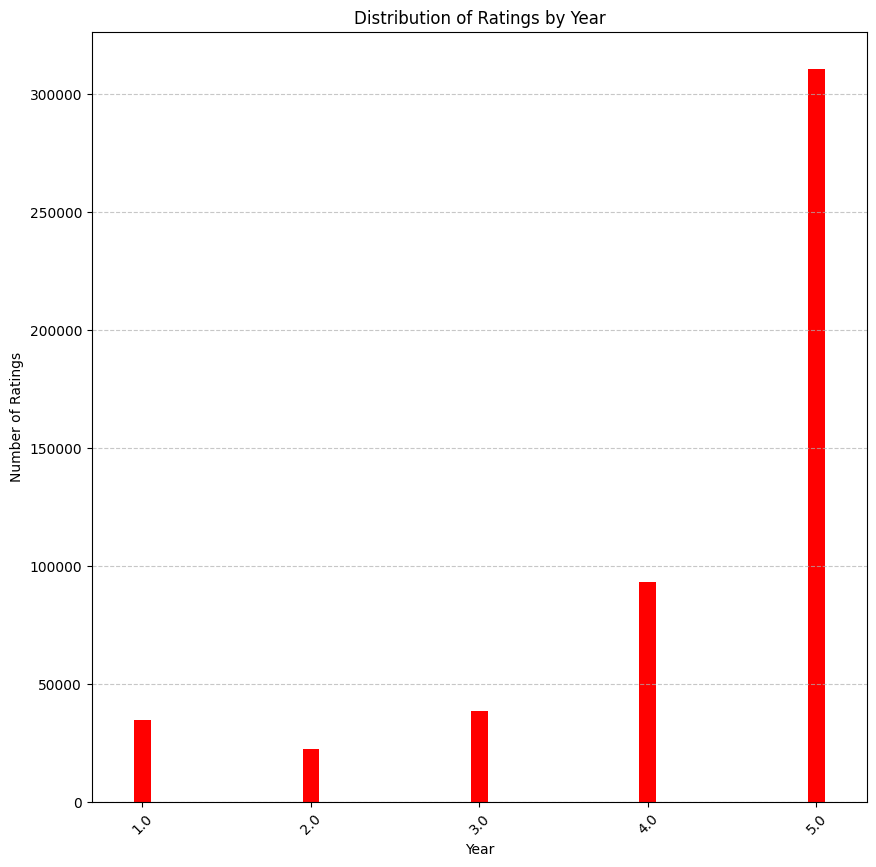

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

ratings_count = pirated_1['ratings'].value_counts()
ratings_count = ratings_count.sort_index()
plt.figure(figsize=(10, 10))
ratings_count.plot(kind='bar', color='red',width=0.1)
plt.title('Distribution of Ratings by Year')
plt.xlabel('Year')
plt.ylabel('Number of Ratings')
plt.xticks(rotation=45)
plt.grid(axis='y',linestyle='--', alpha=0.7)
plt.show()
plt.savefig('ratings vs frequency')

In [ ]:
import numpy as np

ratings_df = pirated_1[['user','asin']].groupby('user').count().reset_index()
ratings_df.columns = ['user', 'number of ratings']

ratings_df


user  number of ratings
0       A0002382258OFJJ2UYNTR                  1
1       A000744229JN9C72EHIVF                  1
2       A00097363JKNBC4UZRGPX                  1
3       A00116463B7B37ZYMF04A                  1
4       A001211614UB7M3DVLGSE                  1
...                       ...                ...
339226          AZZWPNME0GQZ2                  2
339227          AZZX23UGJGKTT                  4
339228          AZZXW4PH4OEEK                  1
339229          AZZYI1EW1WY3M                  1
339230          AZZZTAPYKI9RD                  1

[339231 rows x 2 columns]

In [ ]:
max_val = ratings_df['number of ratings'].max()
print(f"max val is {max_val}")

thresold_val = [5 * i for i in range(90)]
counts =[]
for val in thresold_val:
   count = (ratings_df['number of ratings'] >= val).sum()
   counts.append(count)

data = pd.DataFrame({'thresold':thresold_val, 'count of users':counts})
data

max val is 483


thresold  count of users
0          0          339231
1          5           10057
2         10            2273
3         15             905
4         20             471
..       ...             ...
85       425               3
86       430               3
87       435               3
88       440               3
89       445               3

[90 rows x 2 columns]

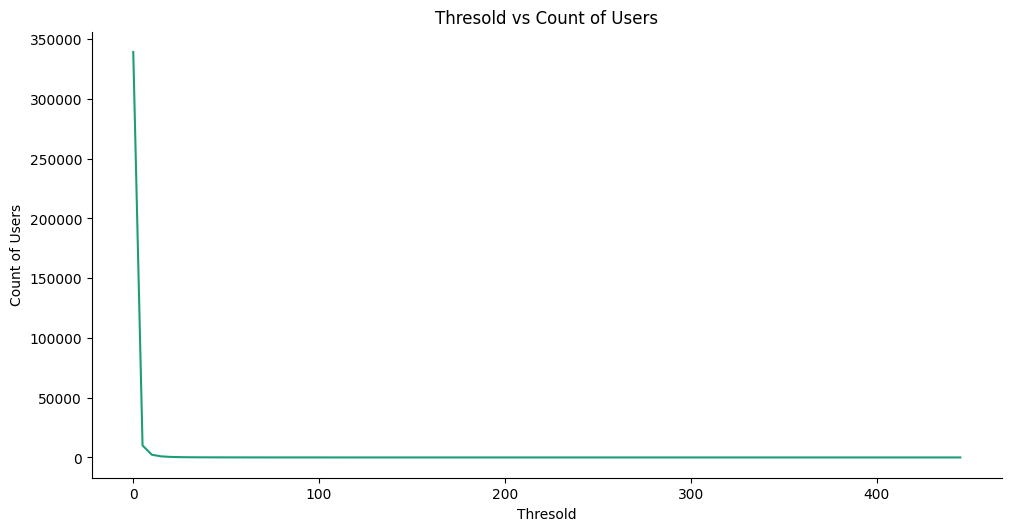

In [ ]:
''' In this graph I have created the graph having total number of users rated items for more than some threshold as seen from above dataframe under name of data '''


data_sorted = data.sort_values('thresold', ascending=True)
fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
palette = sns.color_palette('Dark2')
ax.plot(data_sorted['thresold'], data_sorted['count of users'], color=palette[0], label='Series 1')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Thresold')
plt.ylabel('Count of Users')
plt.title('Thresold vs Count of Users')
plt.show()

{1998: 28, 1999: 186, 2000: 621, 2001: 947, 2002: 926, 2003: 1122, 2004: 1787, 2005: 3141, 2006: 4884, 2007: 8337, 2008: 10286, 2009: 15452, 2010: 28757, 2011: 49574, 2012: 78112, 2013: 174115, 2014: 121901}


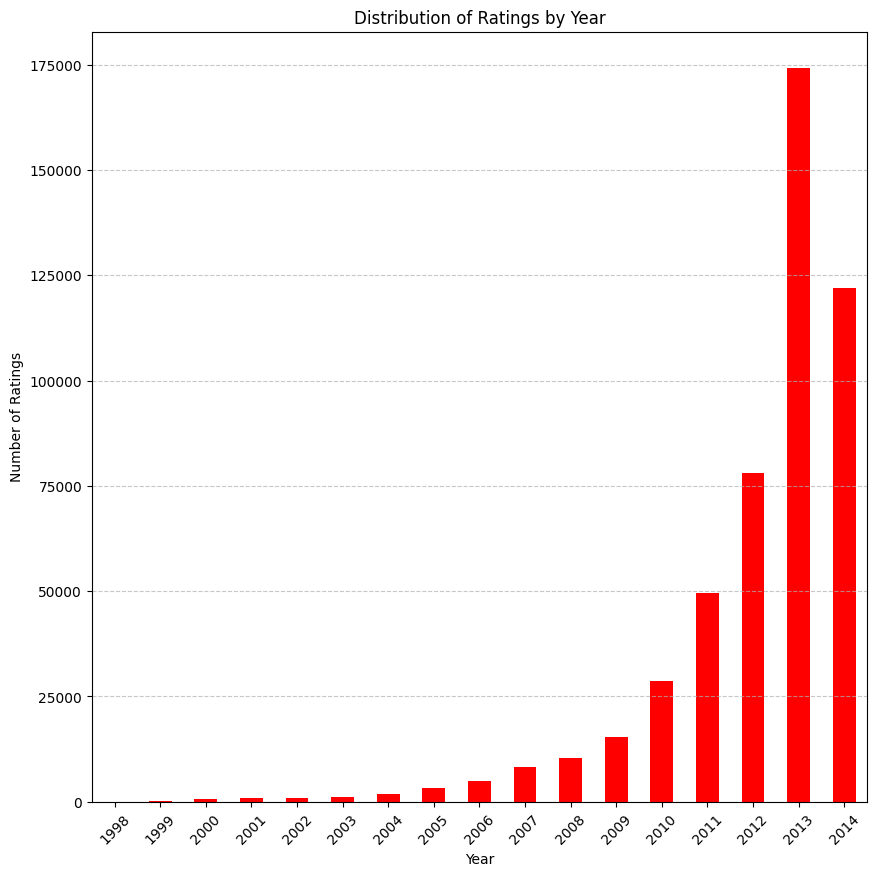

<Figure size 640x480 with 0 Axes>

In [ ]:
pirated_1['timestamp'] = pd.to_datetime(pirated_1['timestamp'])
pirated_1['year'] = pirated_1['timestamp'].dt.year
counts = pirated_1['year'].value_counts()
counts = counts.sort_index()
print(dict(counts))

plt.figure(figsize=(10, 10))
counts.plot(kind='bar', color='red')
plt.title('Distribution of Ratings by Year')
plt.xlabel('Year')
plt.ylabel('Number of Ratings')
plt.xticks(rotation=45)
plt.grid(axis='y',linestyle='--', alpha=0.7)
plt.show()
plt.savefig('Distribution of Ratings by Year')

In [ ]:
import json
import ast
data_list = []

with open('meta_Musical_Instruments.json') as f:

   for line in f:
       line = ast.literal_eval(line)
       # print(type(line))

       for key, value in line.items():
           if isinstance(value, str):
               line[key] = value.replace("'", "")

       for key, value in line.items():
           if isinstance(value, dict):
               line[key] = json.dumps(value)
           elif isinstance(value, list):
               line[key] = json.dumps(value)

           json_string = json.dumps(line, indent=2)

       data = json.loads(json_string)
       data_list.append(data)


for data in data_list:
   if 'salesRank' in data:
       data['salesRank'] = json.loads(data['salesRank'])
   if 'categories' in data:
       data['categories'] = json.loads(data['categories'])

Meta_data = pd.DataFrame(data_list)
Meta_data.to_csv('meta_data.csv',index=False)


In [ ]:
Instruments_data = pd.read_csv('meta_data.csv')
Instruments_data

asin                                              title   price  \
0      0006428320  Six Sonatas For Two Flutes Or Violins, Volume ...   17.95   
1      0014072149  Double Concerto in D Minor By Johann Sebastian...   18.77   
2      0041291905  Hal Leonard Vivaldi Four Seasons for Piano (Or...     NaN   
3      0041913574  Aida: Opera in Quattro Atti, Partitura -- Aida...   49.99   
4      0201891859                                          Nocturnes     NaN   
...           ...                                                ...     ...   
84896  B00LEWRD80  Blue Microphones Yeti USB Microphone - Silver ...  239.99   
84897  B00LIR7QNS  Promotion Item - Alto Recorder Matte Black 3-P...     NaN   
84898  B00LJD5AUM                             Big Muddy Mandolin M-4     NaN   
84899  B00LK7A9SK                                 Yulong Guo Soloist     NaN   
84900  SMLRBIMX03  LR Baggs iMix w/IBeam, Element, Preamp, Mixer,...  229.00   

                                                   imUrl  \
0      http://ecx.images-amazon.com/images/I/41EpRmh8...   
1      http://ecx.images-amazon.com/images/I/41m6ygCq...   
2      http://ecx.images-amazon.com/images/I/41maAqSO...   
3      http://ecx.images-amazon.com/images/I/513kRMv%...   
4      http://ecx.images-amazon.com/images/I/41SXCAzs...   
...                                                  ...   
84896  http://ecx.images-amazon.com/images/I/51MyiLgp...   
84897  http://ecx.images-amazon.com/images/I/31gmIJJQ...   
84898  http://ecx.images-amazon.com/images/I/31SyKqMN...   
84899  http://ecx.images-amazon.com/images/I/315UTGrQ...   
84900  http://ecx.images-amazon.com/images/I/31R3EGJN...   

                             salesRank  \
0      {'Musical Instruments': 207315}   
1       {'Musical Instruments': 94593}   
2      {'Musical Instruments': 222972}   
3                                  NaN   
4      {'Musical Instruments': 171871}   
...                                ...   
84896    {'Musical Instruments': 3973}   
84897   {'Musical Instruments': 32216}   
84898                              NaN   
84899                              NaN   
84900  {'Musical Instruments': 107527}   

                                              categories  \
0      [['Musical Instruments', 'Instrument Accessori...   
1                              [['Musical Instruments']]   
2      [['Musical Instruments', 'Instrument Accessori...   
3                              [['Musical Instruments']]   
4      [['Musical Instruments', 'Instrument Accessori...   
...                                                  ...   
84896  [['Musical Instruments', 'Microphones & Access...   
84897  [['Musical Instruments', 'Band & Orchestra', '...   
84898  [['Musical Instruments', 'Stringed Instruments...   
84899  [['Musical Instruments', 'Guitars', 'Classical...   
84900  [['Musical Instruments', 'Instrument Accessori...   

                                                 related     brand  \
0                                                    NaN       NaN   
1      {"also_viewed": ["B0058DK7RA"], "buy_after_vie...       NaN   
2                                                    NaN       NaN   
3                                                    NaN       NaN   
4                                                    NaN       NaN   
...                                                  ...       ...   
84896  {"also_viewed": ["B002VA464S", "B005DVF15A", "...       NaN   
84897  {"also_viewed": ["B00LIR3SK8", "B00502E892", "...       NaN   
84898                                                NaN       NaN   
84899                                                NaN       NaN   
84900  {"also_viewed": ["B003SRHFIW", "B001E95KJC", "...  LR Baggs   

                                             description  
0                                                    NaN  
1      Composer: J.S. Bach.Peters Edition.For two vio...  
2      Vivaldis famous set of four violin concertos c...  
3      444 pages. \nReprint 

Dict is {'0': 1, '1/2 SIZE QUALITY WOOD / HORSE HAIR VIOLIN BOW': 1, '3/4 bow': 1, '32 Key Melodica': 1, '365 Songs for Better Living': 1, '4/4 FULL SIZE QUALITY WOOD / HORSE HAIR VIOLIN BOW': 1, '5 LED': 1, '8Decades': 1, '920D Custom Shop': 1, '99 Volts': 3, 'A Day&#39;s Work': 2, 'A-Designs': 2, 'A. Breton': 16, 'AAR': 1, 'AB': 2, 'ABM': 1, 'ACE': 13, 'ADA': 1, 'ADJ Products': 33, 'ADK Microphones': 2, 'AER': 1, 'AGPtek': 2, 'AIAIAI': 4, 'AKG': 19, 'AKG Acoustics': 1, 'AKG Pro Audio': 44, 'AMPNG': 1, 'AMSCAN': 1, 'AMT Electronics': 2, 'AP': 1, 'APC': 9, 'API': 2, 'APM': 1, 'ART': 40, 'ART M-Six': 1, 'AV Link': 1, 'AV-JEFES': 1, 'AViiQ': 1, 'AXESS': 1, 'AXL': 41, 'Abbott Reeds': 1, 'Abco Tech': 3, 'Able': 1, 'Ableton': 5, 'Accent': 1, 'Accessories Unlimited': 1, 'Accetera': 3, 'Accu Cable': 4, 'Accutronics': 3, 'Accuwound': 1, 'Ace products': 1, 'Acesonic': 3, 'Acme': 10, 'Acolyte': 1, 'Acorn': 4, 'AcoustaGrip': 3, 'Acoustic': 9, 'Acoustic Magic': 1, 'Acoustica': 1, 'Adam': 5, 'Adam 

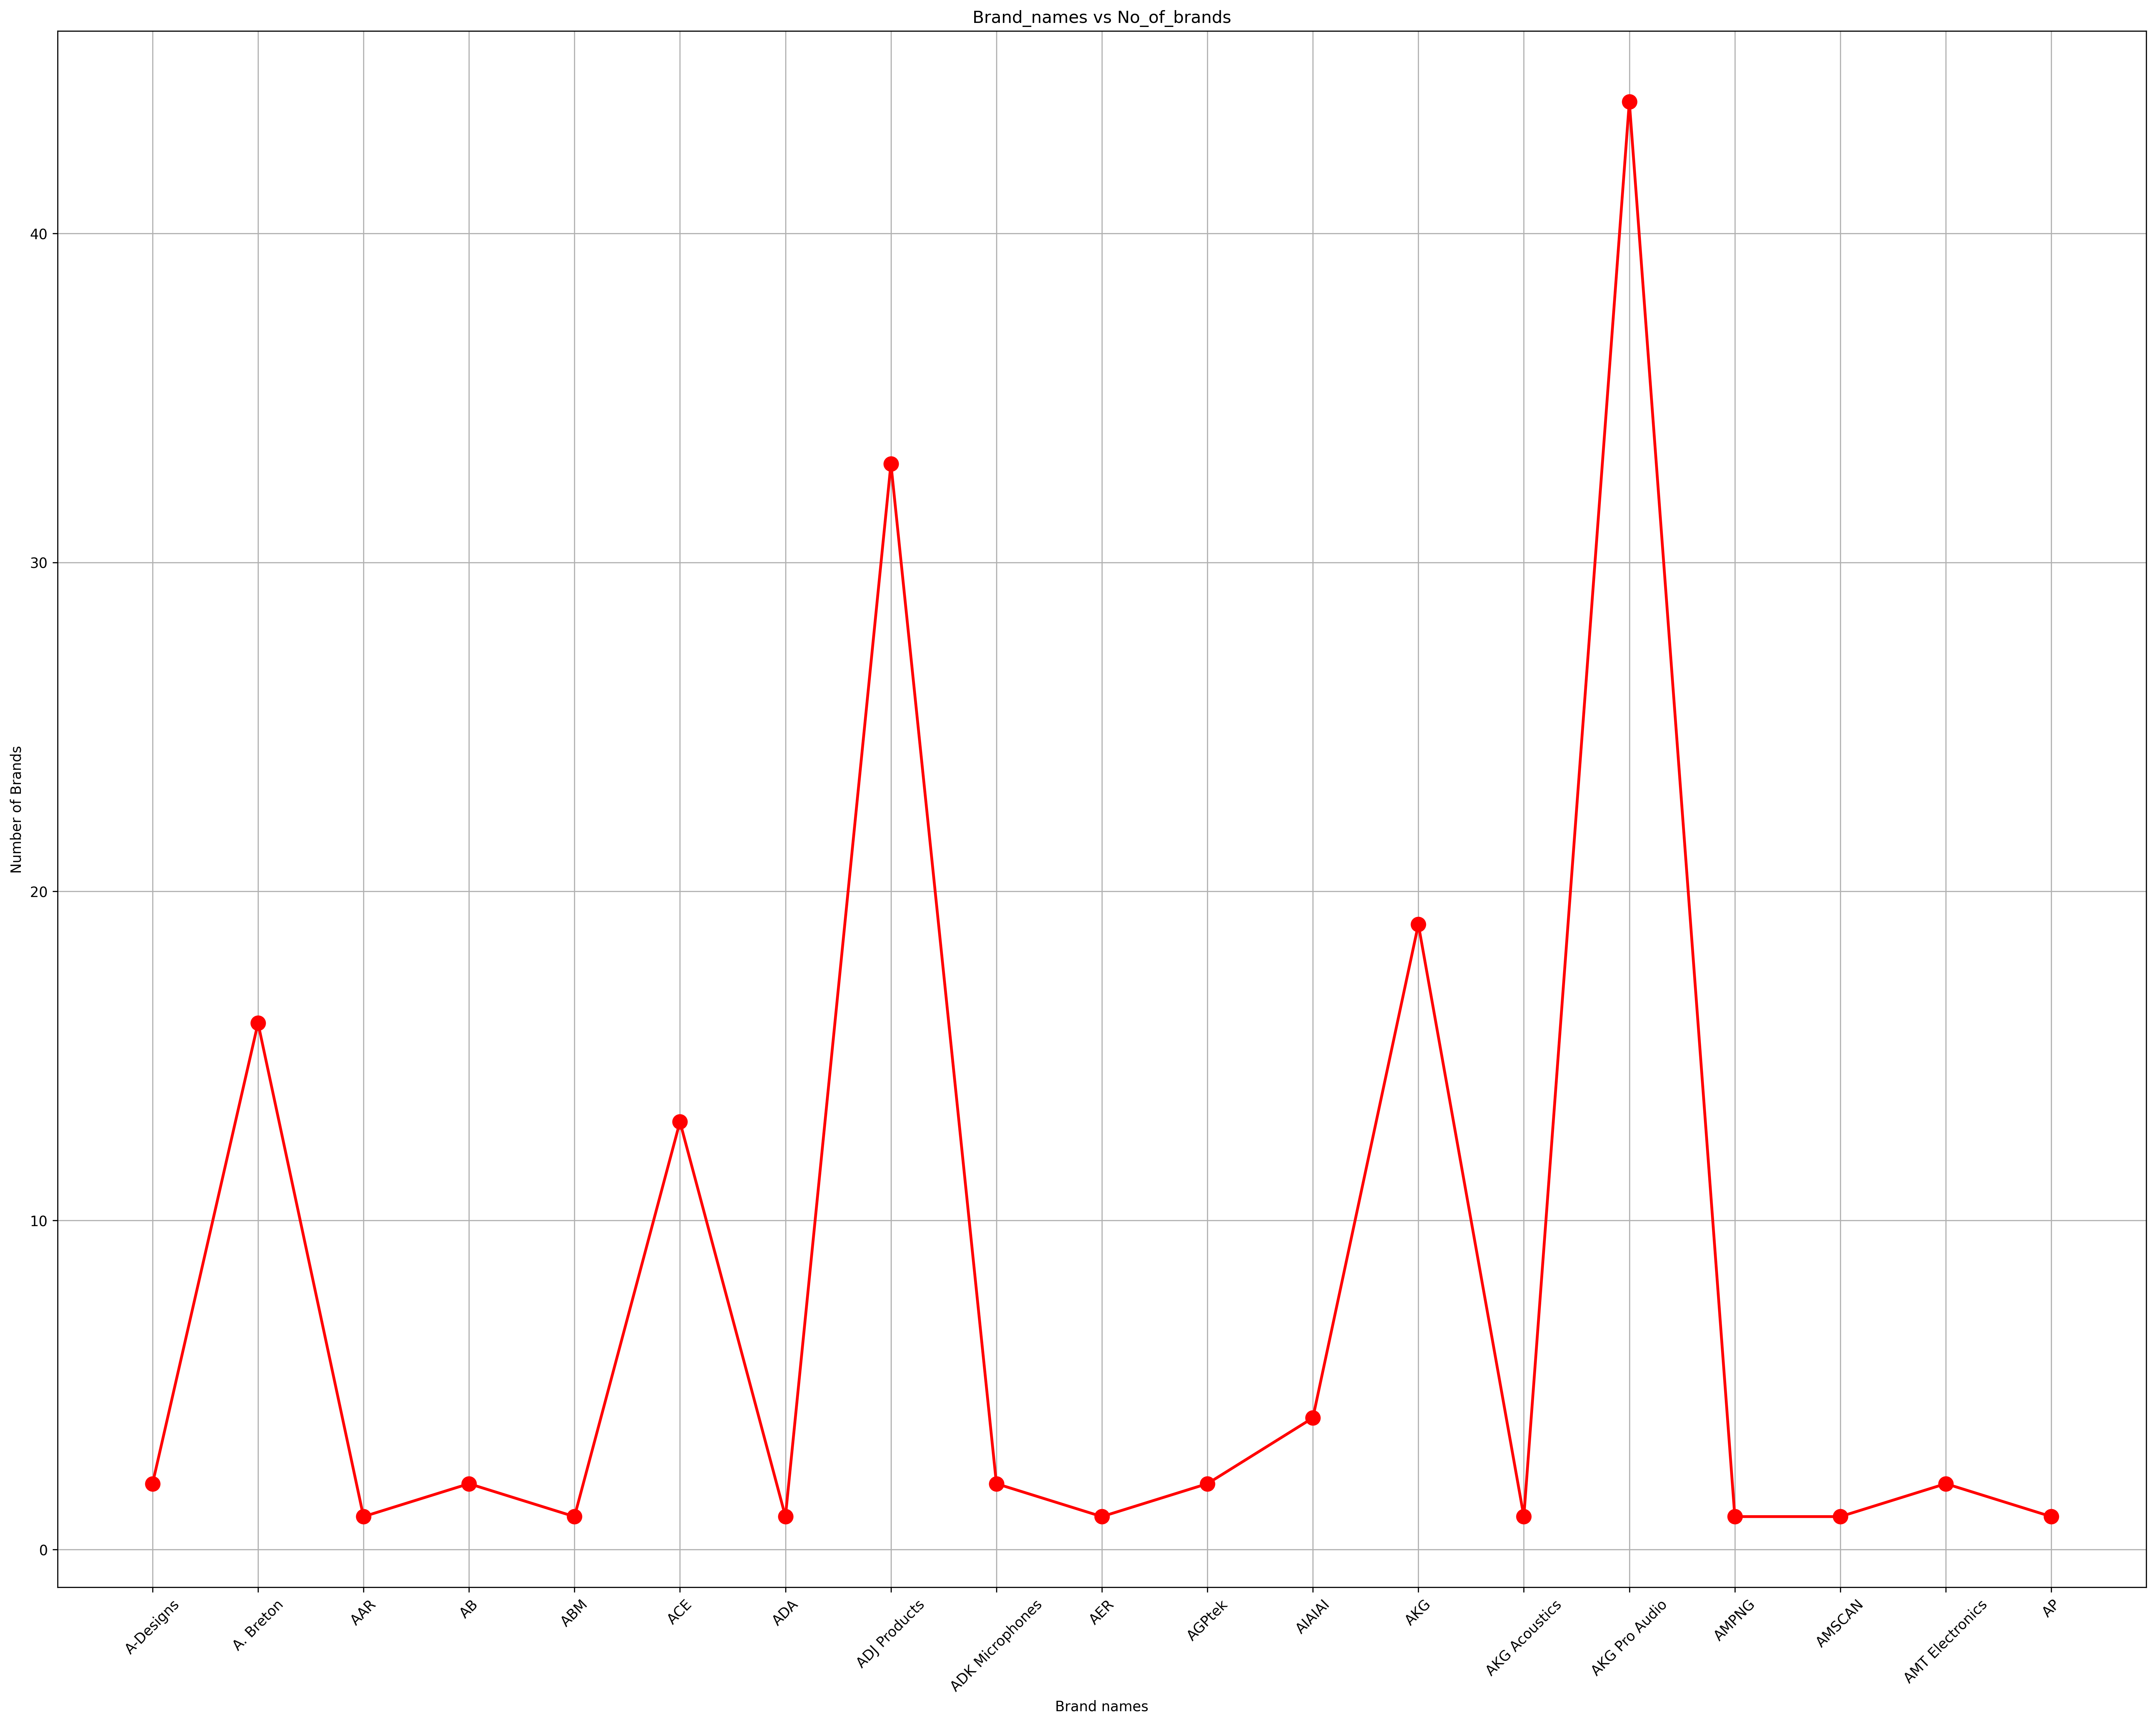

<Figure size 640x480 with 0 Axes>

In [ ]:
Instruments_data_F = Instruments_data[Instruments_data['brand'].notna()]
Brands_count = Instruments_data_F['brand'].value_counts().sort_index()
Counts = dict(Brands_count) # Brands_count
my_dpi = 300

Brand_name = []
No_of_brands = []
for key , value in Counts.items():
  Brand_name.append(key)
  No_of_brands.append(value)

print(f"Dict is {Counts}")
print(f"Brand names are {Brand_name}")
print(f"No_of_Brands are {No_of_brands}")

# 11=>24
plt.figure(figsize=(8000/my_dpi, 6000/my_dpi), dpi = my_dpi)
plt.plot(Brand_name[11:30],No_of_brands[11:30],label='number of brands',color='r',marker='o',markersize=10,linewidth=2)
plt.title('Brand_names vs No_of_brands')
plt.xlabel('Brand names')
plt.ylabel('Number of Brands')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
plt.savefig('Brand_names vs No_of_brands')

Extraction_A_list : ['0014072149', '0634029363', '0634029355', '0634029347', '0634050028', '0634055429', '0634055534', '0634061801', '0634065459', '0739003755', '0739037986', '0739040375', '0739040251', '0739040308', '0739042726', '0739046500', '0739045032', '0739048287', '0739045067', '073904852X']
also_bought : [17, 25, 21, 11, 3, 56, 1, 76, 98, 75, 4, 10, 24, 14, 92, 21, 10, 95, 100, 8]
also_viewed : [1, 5, 4, 47, 1, 1, 4, 6, 8, 8, 1, 3, 2, 2, 2, 1, 8, 13, 58, 4]
bought_together: [1, 1, 2, 2, 1, 1, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2]
buy_after_viewing: [1, 4, 4, 3, 2, 4, 4, 1, 4, 4, 4, 4, 4, 4, 4, 4, 1, 4, 4, 4]


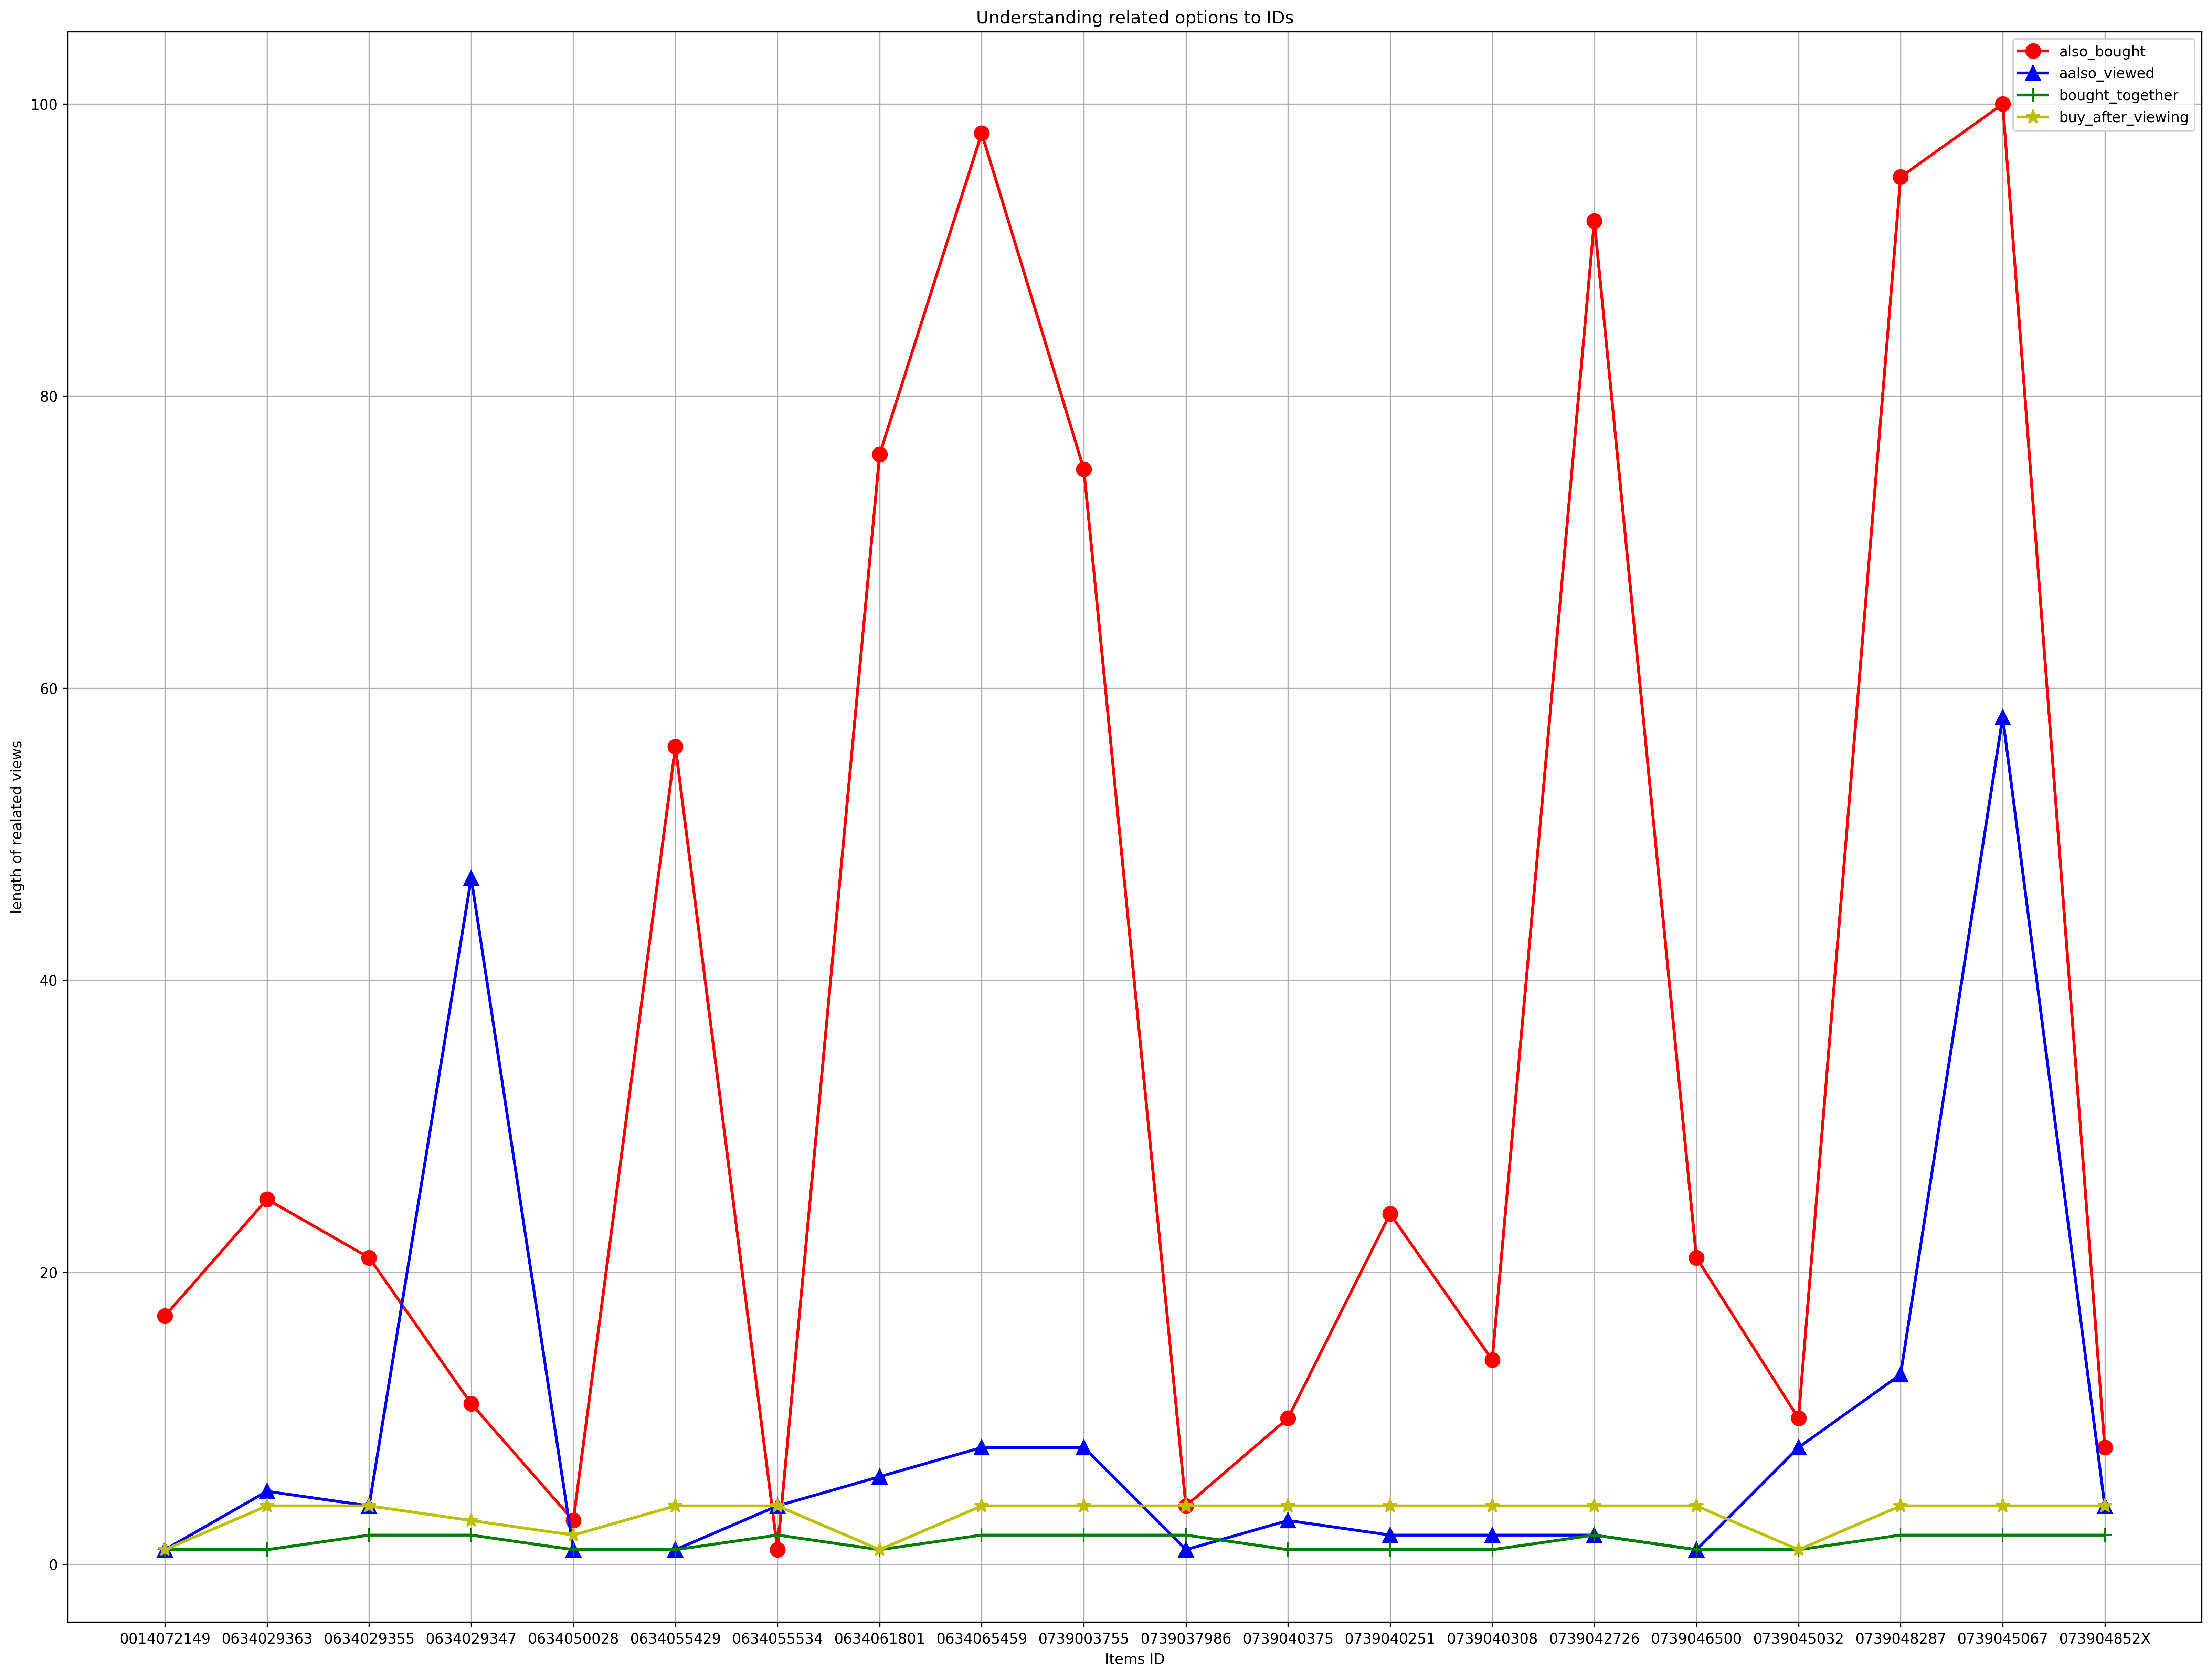

<Figure size 640x480 with 0 Axes>

In [ ]:
Filtered_Ins = Instruments_data.filter(items=['asin','related'])
Filtered_Ins = Filtered_Ins[Filtered_Ins['related'].notna()].reset_index(drop=True)

extraction_A_list = []
also_bought = []
also_viewed = []
bought_together = []
buy_after_viewing = []
my_dpi = 300

for i in range(len(Filtered_Ins['asin'])):
    extraction_A = Filtered_Ins.iloc[i,0]
    extraction_B = ast.literal_eval(Filtered_Ins.iloc[i,1])
    extraction_A_list.append(extraction_A)

    for key, value in extraction_B.items():
        if key == 'also_bought':
            also_bought.append(len(value))
        elif key == 'also_viewed':
            also_viewed.append(len(value))
        elif key == 'bought_together':
            bought_together.append(len(value))
        elif key == 'buy_after_viewing':
            buy_after_viewing.append(len(value))

print(f"Extraction_A_list : {extraction_A_list[0:20]}")
print(f"also_bought : {also_bought[0:20]}")
print(f"also_viewed : {also_viewed[0:20]}")
print(f"bought_together: {bought_together[0:20]}")
print(f"buy_after_viewing: {buy_after_viewing[0:20]}")

plt.figure(figsize=(8000/my_dpi, 6000/my_dpi), dpi = my_dpi)
plt.plot(extraction_A_list[0:20],also_bought[0:20],label='also_bought',color='r',marker='o',markersize=10,linewidth=2)
plt.plot(extraction_A_list[0:20],also_viewed[0:20],label='aalso_viewed',color='b',marker='^',markersize=10,linewidth=2)
plt.plot(extraction_A_list[0:20],bought_together[0:20],label='bought_together',color='g',marker='+',markersize=10,linewidth=2)
plt.plot(extraction_A_list[0:20],buy_after_viewing[0:20],label='buy_after_viewing',color='y',marker='*',markersize=10,linewidth=2)
plt.xlabel('Items ID')
plt.ylabel('length of realated views')
plt.title('Understanding related options to IDs')
plt.grid(True)
plt.legend()
plt.show()
plt.savefig('Understanding related options to IDs')

Extraction_A_list : ['0014072149', '0634029363', '0634029355', '0634029347', '0634050028', '0634055429', '0634055534', '0634061801', '0634065459', '0739003755', '0739037986', '0739040375', '0739040251', '0739040308', '0739042726', '0739046500', '0739045032', '0739048287', '0739045067', '073904852X']
Industrial_Scientific : [144850, 157206, 36847, 57812, 28615, 236489, 63988, 65686, 8214, 273391, 59793, 165927, 589250, 10853, 36282, 242921, 108397, 100298, 87539, 275694]
Grocery_Gourmet_Food : [14842]
Patio_Lawn_Garden : [50013, 138138, 138471, 676524, 325986, 134192, 71409, 7084, 26263, 162361, 285087, 150677, 191495, 235108, 258616, 200198, 352085, 228714, 289607, 227800]
Beauty : [242510, 482155, 97700, 447093, 105007, 105716, 339094]
Watches : [2886]
Video_Games : [39580, 122729, 120772, 43661, 54682, 78815, 116770, 75042, 85461, 83741, 124549, 122884, 74970, 71420, 44981, 42611, 33728, 84074, 54101, 27106]
Musical_Instruments : [207315, 94593, 222972, 171871, 18688, 3729, 15634, 88

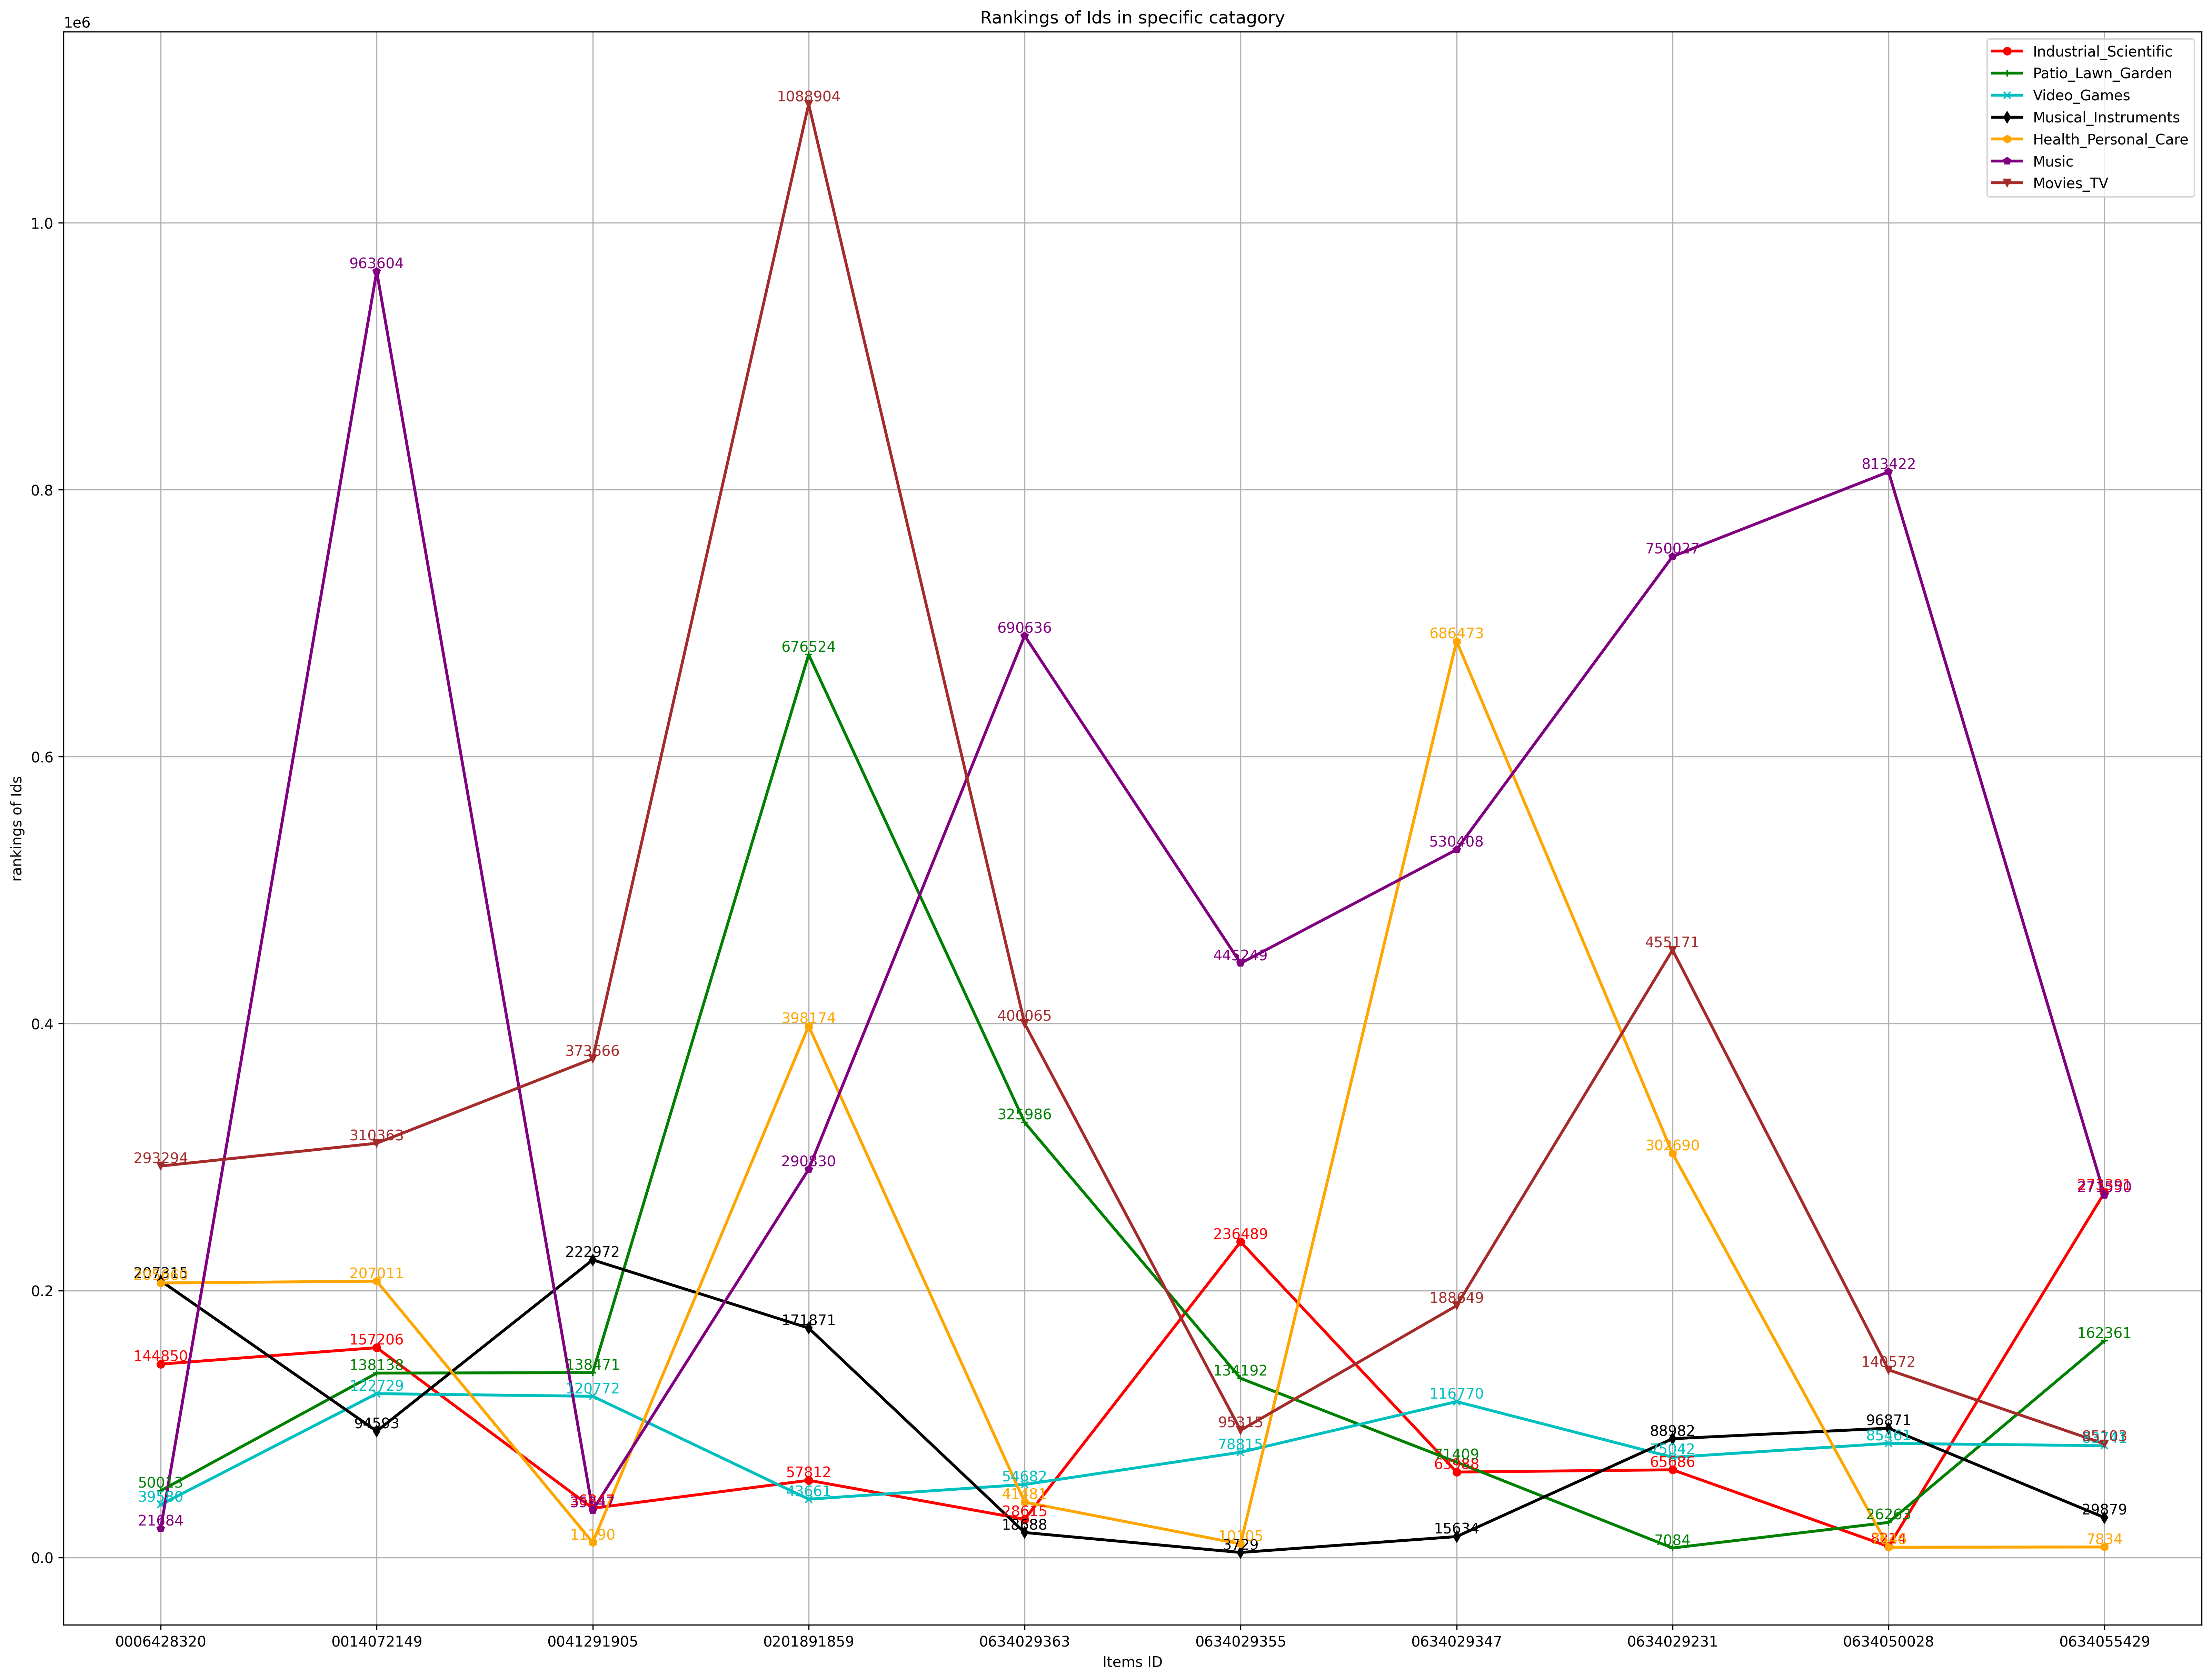

<Figure size 640x480 with 0 Axes>

In [ ]:
Filtered_Ins_1 = Instruments_data.filter(items=['asin','salesRank'])
Filtered_Ins_1 = Filtered_Ins_1[Filtered_Ins_1['salesRank'].notna()].reset_index(drop=True)

extraction_X_list = []
Industrial_Scientific = []
Grocery_Gourmet_Food = []
Patio_Lawn_Garden = []
Beauty = []
Watches = []
Video_Games = []
Musical_Instruments = []
Health_Personal_Care = []
Music = []
Books = []
Movies_TV = []
my_dpi = 300

for i in range(len(Filtered_Ins_1['asin'])):
    extraction_A = Filtered_Ins_1.iloc[i,0]
    extraction_B = ast.literal_eval(Filtered_Ins_1.iloc[i,1])
    extraction_X_list.append(extraction_A)
    for k,v in extraction_B.items():
      if k == "Industrial & Scientific":
        Industrial_Scientific.append(v)
      elif k == "Grocery & Gourmet Food":
         Grocery_Gourmet_Food.append(v)
      elif k == "Patio, Lawn & Garden":
         Patio_Lawn_Garden.append(v)
      elif k == "Beauty":
         Beauty.append(v)
      elif k == "Watches":
         Watches.append(v)
      elif k == "Video Games":
         Video_Games.append(v)
      elif k == "Musical Instruments":
        Musical_Instruments.append(v)
      elif k == "Health & Personal Care":
        Health_Personal_Care.append(v)
      elif k == "Music":
        Music.append(v)
      elif k == "Books":
        Books.append(v)
      elif k == "Movies & TV":
        Movies_TV.append(v)

print(f"Extraction_A_list : {extraction_A_list[0:20]}")
print(f"Industrial_Scientific : {Industrial_Scientific[0:20]}")
print(f"Grocery_Gourmet_Food : {Grocery_Gourmet_Food[0:20]}")
print(f"Patio_Lawn_Garden : {Patio_Lawn_Garden[0:20]}")
print(f"Beauty : {Beauty[0:20]}")
print(f"Watches : {Watches[0:20]}")
print(f"Video_Games : {Video_Games[0:20]}")
print(f"Musical_Instruments : {Musical_Instruments[0:20]}")
print(f"Health_Personal_Care : {Health_Personal_Care[0:20]}")
print(f"Music : {Music[0:20]}")
print(f"Books : {Books[0:20]}")
print(f"Movies_TV : {Movies_TV[0:20]}")



plt.figure(figsize=(8000/my_dpi, 6000/my_dpi), dpi = my_dpi)
plt.plot(extraction_X_list[0:10], Industrial_Scientific[0:10], label='Industrial_Scientific', color='r', marker='o', markersize=5, linewidth=2)
plt.plot(extraction_X_list[0:10], Patio_Lawn_Garden[0:10], label='Patio_Lawn_Garden', color='g', marker='+', markersize=5, linewidth=2)
plt.plot(extraction_X_list[0:10], Video_Games[0:10], label='Video_Games', color='c', marker='x', markersize=5, linewidth=2)
plt.plot(extraction_X_list[0:10], Musical_Instruments[0:10], label='Musical_Instruments', color='k', marker='d', markersize=5, linewidth=2)
plt.plot(extraction_X_list[0:10], Health_Personal_Care[0:10], label='Health_Personal_Care', color='orange', marker='h', markersize=5, linewidth=2)
plt.plot(extraction_X_list[0:10], Music[0:10], label='Music', color='purple', marker='p', markersize=5, linewidth=2)
plt.plot(extraction_X_list[0:10], Movies_TV[0:10], label='Movies_TV', color='brown', marker='v', markersize=5, linewidth=2)
plt.xlabel('Items ID')
plt.ylabel('rankings of Ids')
plt.title('Rankings of Ids in specific catagory')
plt.grid(True)
plt.legend()

for i in range(10):
    plt.text(extraction_X_list[i], Industrial_Scientific[i], str(Industrial_Scientific[i]), color='r', fontsize=10, ha='center', va='bottom')
    plt.text(extraction_X_list[i], Patio_Lawn_Garden[i], str(Patio_Lawn_Garden[i]), color='g', fontsize=10, ha='center', va='bottom')
    plt.text(extraction_X_list[i], Video_Games[i], str(Video_Games[i]), color='c', fontsize=10, ha='center', va='bottom')
    plt.text(extraction_X_list[i], Musical_Instruments[i], str(Musical_Instruments[i]), color='k', fontsize=10, ha='center', va='bottom')
    plt.text(extraction_X_list[i], Health_Personal_Care[i], str(Health_Personal_Care[i]), color='orange', fontsize=10, ha='center', va='bottom')
    plt.text(extraction_X_list[i], Music[i], str(Music[i]), color='purple', fontsize=10, ha='center', va='bottom')
    plt.text(extraction_X_list[i], Movies_TV[i], str(Movies_TV[i]), color='brown', fontsize=10, ha='center', va='bottom')

plt.show()
plt.savefig('Rankings of Ids in specific catagory')

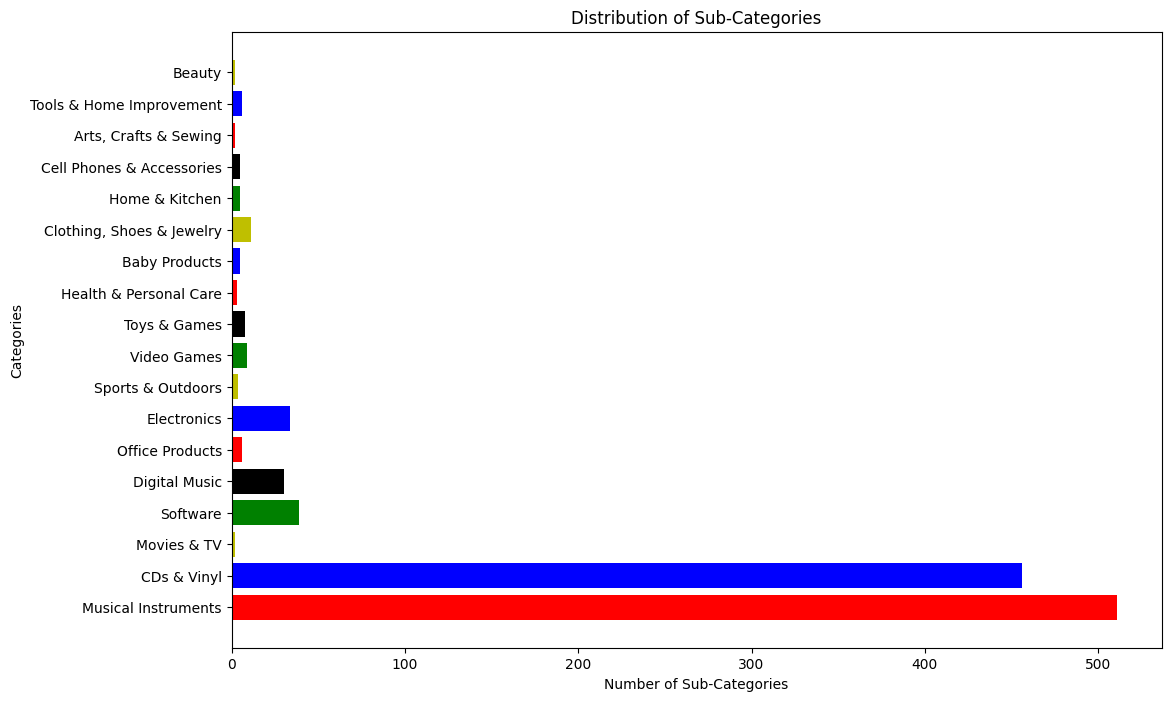

<Figure size 640x480 with 0 Axes>

In [ ]:
Filtered_Ins_2 = Instruments_data.filter(items=['asin','categories'])
Filtered_Ins_2 = Filtered_Ins_2[Filtered_Ins_2['categories'].notna()].reset_index(drop=True)


category = []
for i in range(len(Filtered_Ins_2['categories'])):
    extracted = Filtered_Ins_2.iloc[i, 1]
    category.append(extracted)
av = []
Main_categories = {}
for x in category:
    evaluated_str_lst = ast.literal_eval(x)
    av.append(evaluated_str_lst)
for i in range(len(av)):
    for j in range(len(av[i])):
        main_cat = av[i][j][0]
        sub_cat = av[i][j][1:]
        if main_cat in Main_categories:
            ex_sub_cats = Main_categories[main_cat]
            for cat in sub_cat:
                if cat not in ex_sub_cats:
                    ex_sub_cats.append(cat)
                    Main_categories[main_cat] = ex_sub_cats
        else:
          Main_categories[main_cat] = list(sub_cat)

Main_categories


main_categories = list(Main_categories.keys())
sub_categories_counts = [len(Main_categories[cat]) for cat in main_categories]


plt.figure(figsize=(12, 8))
plt.barh(main_categories, sub_categories_counts, color=['r','b','y','g','black'])
plt.xlabel('Number of Sub-Categories')
plt.ylabel('Categories')
plt.title('Distribution of Sub-Categories')
plt.show()
plt.savefig('Distribution of sub categories')

# **Data Preprocessing**


In [ ]:
Instruments_data.describe()


price
count  69070.000000
mean      94.661903
std      154.260212
min        0.000000
25%       13.880000
50%       30.670000
75%       99.990000
max      999.990000

In [ ]:
percent_missing = Instruments_data.isna().sum() * 100 / len(Instruments_data)
Instruments_data.isna().sum()
print(round(percent_missing,2))

asin            0.00
title          11.38
price          18.65
imUrl           0.08
salesRank       2.79
categories      0.00
related        19.50
brand          61.02
description    16.23
dtype: float64


In [ ]:
merged_cv = pd.merge(pirated_1,Instruments_data, on='asin')
merged_cv.isnull().sum()
Drop_df = merged_cv.dropna(subset=['title']).drop(columns=['imUrl','salesRank','description','related','price','brand']).reset_index(drop=True)

C_list = []
for i in range(len(Drop_df['categories'])):
    extracted = ast.literal_eval(Drop_df.iloc[i,6])
    C_list.append(extracted)

def unique_items(C_list):
  unique_list = []
  for group in C_list:
    unique_set = set()
    for i in group:
      if isinstance(i,list):
        for j in i:
          unique_set.add(j)
      else:
        unique_set.add(i)
    unique_list.append(list(unique_set))

  return unique_list
unique_list = unique_items(C_list)
unique_list

Drop_df['Categories_Alt'] = unique_list
Drop_df['year'] = Drop_df['year'].apply(lambda x: int(x))
Drop_df['month'] = Drop_df['timestamp'].dt.month
New_dropped_dataframe = Drop_df.drop(columns=['categories'])
New_dropped_dataframe

user        asin  ratings  timestamp  year  \
0       A1YS9MDZP93857  0006428320      3.0 2014-03-11  2014   
1       A3TS466QBAWB9D  0014072149      5.0 2013-06-06  2013   
2       A3BUDYITWUSIS7  0041291905      5.0 2013-10-14  2013   
3       A19K10Z0D2NTZK  0041913574      5.0 2010-09-23  2010   
4       A14X336IB4JD89  0201891859      1.0 2012-10-17  2012   
...                ...         ...      ...        ...   ...   
455908   A2XEVARMJP81E  B00LIR7QNS      5.0 2014-07-18  2014   
455909  A3PAQGM6P87MXO  B00LJD5AUM      5.0 2014-07-05  2014   
455910  A2KZX7A4XZ4T2W  B00LK7A9SK      5.0 2014-07-05  2014   
455911   AIDHT6KXOL64T  SMLRBIMX03      5.0 2012-12-18  2012   
455912  A161I1MHX2G2BR  SMLRBIMX03      4.0 2013-04-02  2013   

                                                    title  \
0       Six Sonatas For Two Flutes Or Violins, Volume ...   
1       Double Concerto in D Minor By Johann Sebastian...   
2       Hal Leonard Vivaldi Four Seasons for Piano (Or...   
3       Aida: Opera in Quattro Atti, Partitura -- Aida...   
4                                               Nocturnes   
...                                                   ...   
455908  Promotion Item - Alto Recorder Matte Black 3-P...   
455909                             Big Muddy Mandolin M-4   
455910                                 Yulong Guo Soloist   
455911  LR Baggs iMix w/IBeam, Element, Preamp, Mixer,...   
455912  LR Baggs iMix w/IBeam, Element, Preamp, Mixer,...   

                                           Categories_Alt  month  
0       [Instrument Accessories, General Accessories, ...      3  
1                                   [Musical Instruments]      6  
2       [Instrument Accessories, General Accessories, ...     10  
3                                   [Musical Instruments]      9  
4       [Instrument Accessories, General Accessories, ...     10  
...                                                   ...    ...  
455908  [Band & Orchestra, Recorders, Wind & Woodwinds...      7  
455909  [Stringed Instruments, Folk & World, Musical I...      7  
455910  [Classical & Nylon-String Guitars, Guitars, Mu...      7  
455911  [Guitar & Bass Accessories, Musical Instrument...     12  
455912  [Guitar & Bass Accessories, Musical Instrument...      4  

[455913 rows x 8 columns]

In [ ]:
New_dropped_dataframe['ratings'].describe()
New_dropped_dataframe.isnull().sum()

user              0
asin              0
ratings           0
timestamp         0
year              0
title             0
Categories_Alt    0
month             0
dtype: int64

In [ ]:
New_dropped_dataframe.dtypes

user                      object
asin                      object
ratings                  float64
timestamp         datetime64[ns]
year                       int64
title                     object
Categories_Alt            object
month                      int32
dtype: object

In [ ]:
exploded = New_dropped_dataframe.explode('Categories_Alt')
print(f" Total unique categories are {len(exploded['Categories_Alt'].unique())}")
print(f"value counts for each categories are {exploded['Categories_Alt'].value_counts()}")
exploded

 Total unique catrgories are 1020
value counts for each categories are Categories_Alt
Musical Instruments          455913
Instrument Accessories       182766
Guitar & Bass Accessories     88700
Live Sound & Stage            41756
General Accessories           39392
                              ...  
Neys                              1
T-Shirts                          1
Interviews                        1
Jamaican Ska                      1
Mexican Cumbia                    1
Name: count, Length: 1020, dtype: int64


user        asin  ratings  timestamp  year  \
0       A1YS9MDZP93857  0006428320      3.0 2014-03-11  2014   
0       A1YS9MDZP93857  0006428320      3.0 2014-03-11  2014   
0       A1YS9MDZP93857  0006428320      3.0 2014-03-11  2014   
0       A1YS9MDZP93857  0006428320      3.0 2014-03-11  2014   
1       A3TS466QBAWB9D  0014072149      5.0 2013-06-06  2013   
...                ...         ...      ...        ...   ...   
455912  A161I1MHX2G2BR  SMLRBIMX03      4.0 2013-04-02  2013   
455912  A161I1MHX2G2BR  SMLRBIMX03      4.0 2013-04-02  2013   
455912  A161I1MHX2G2BR  SMLRBIMX03      4.0 2013-04-02  2013   
455912  A161I1MHX2G2BR  SMLRBIMX03      4.0 2013-04-02  2013   
455912  A161I1MHX2G2BR  SMLRBIMX03      4.0 2013-04-02  2013   

                                                    title  \
0       Six Sonatas For Two Flutes Or Violins, Volume ...   
0       Six Sonatas For Two Flutes Or Violins, Volume ...   
0       Six Sonatas For Two Flutes Or Violins, Volume ...   
0       Six Sonatas For Two Flutes Or Violins, Volume ...   
1       Double Concerto in D Minor By Johann Sebastian...   
...                                                   ...   
455912  LR Baggs iMix w/IBeam, Element, Preamp, Mixer,...   
455912  LR Baggs iMix w/IBeam, Element, Preamp, Mixer,...   
455912  LR Baggs iMix w/IBeam, Element, Preamp, Mixer,...   
455912  LR Baggs iMix w/IBeam, Element, Preamp, Mixer,...   
455912  LR Baggs iMix w/IBeam, Element, Preamp, Mixer,...   

                           Categories_Alt  month  
0                  Instrument Accessories      3  
0                     General Accessories      3  
0                     Musical Instruments      3  
0                     Sheet Music Folders      3  
1                     Musical Instruments      6  
...                                   ...    ...  
455912          Guitar & Bass Accessories      4  
455912                Musical Instruments      4  
455912             Instrument Accessories      4  
455912  Acoustic & Classical Guitar Parts      4  
455912            Pickups & Pickup Covers      4  

[2073713 rows x 8 columns]

In [ ]:
HM_data_by_month = exploded.groupby(['month', 'Categories_Alt'])['ratings'].mean().unstack() # heat map == HM
HM_data_by_month = HM_data_by_month.dropna(axis=1, how='any')
HM_data_by_month

Categories_Alt  Accessories  Accordion Accessories  Accordions  Acid Jazz  \
month                                                                       
1                  4.176110               4.000000    3.714286   3.750000   
2                  4.187351               4.352941    3.705882   5.000000   
3                  4.209815               4.466667    3.884615   4.400000   
4                  4.169099               4.444444    3.727273   3.400000   
5                  4.196746               3.500000    3.590909   3.000000   
6                  4.165819               4.187500    3.636364   3.000000   
7                  4.203944               4.750000    3.736842   3.200000   
8                  4.117219               3.666667    3.470588   4.666667   
9                  4.173175               4.300000    4.000000   3.000000   
10                 4.204242               3.454545    4.520000   4.666667   
11                 4.134993               4.200000    3.750000   2.333333   
12                 4.145038               4.062500    3.677419   4.000000   

Categories_Alt  Acoustic & Acoustic-Electric Basses  \
month                                                 
1                                          4.363636   
2                                          3.854545   
3                                          4.265306   
4                                          3.823529   
5                                          4.257143   
6                                          4.170732   
7                                          3.883721   
8                                          4.000000   
9                                          4.029412   
10                                         3.931034   
11                                         3.939394   
12                                         3.913793   

Categories_Alt  Acoustic & Classical Guitar Bags & Cases  \
month                                                      
1                                               4.402116   
2                                               4.238994   
3                                               4.190588   
4                                               4.194226   
5                                               4.182796   
6                                               4.275676   
7                                               4.300912   
8                                               4.269841   
9                                               4.169173   
10                                              4.231293   
11                                              4.138776   
12                                              4.200893   

Categories_Alt  Acoustic & Classical Guitar Parts  Acoustic Blues  \
month                                                               
1                                        4.287770        4.636364   
2                                        4.182540        4.470588   
3                                        4.255869        4.000000   
4                                        4.164141        4.100000   
5                                        4.248744        5.000000   
6                                        4.317333        4.625000   
7                                        4.256983        4.250000   
8                                        4.277154        5.000000   
9                                        4.119617        4.300000   
10                                       4.123288        4.285714   
11                                       4.321429        4.400000   
12                                       4.245763        4.000000   

Categories_Alt  Acoustic Guitar Amplifiers & Preamps  Acoustic Guitar Effects  \
month                                                                           
1                                           4.444444                 4.400000   
2                                           4.396226                 3.750000   
3                 

<Axes: xlabel='Categories_Alt', ylabel='month'>

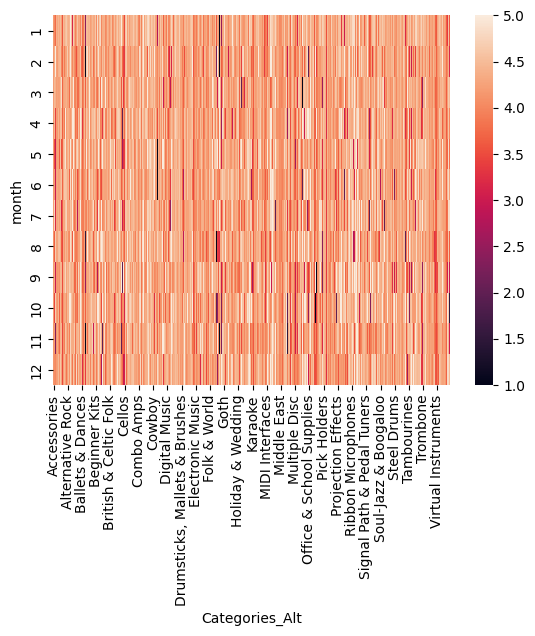

In [ ]:
import seaborn as sns
sns.heatmap(HM_data_by_month)

In [ ]:
unique_list = unique_items(C_list)
unique_list
Drop_df['Categories_Alt'] = unique_list
Drop_df['Categories_Alt'] = Drop_df['Categories_Alt'].apply(lambda x: str(x))
Drop_df['year'] = Drop_df['year'].apply(lambda x: int(x))
Drop_df['datetime'] = Drop_df['timestamp'].dt.date
New_dropped_dataframe_1 = Drop_df.drop(columns=(['categories','timestamp']))

column_order = ['user', 'asin', 'ratings', 'title','datetime','year','month','Categories_Alt']
New_dropped_dataframe_1 = New_dropped_dataframe_1[column_order]
New_dropped_dataframe_1


user        asin  ratings  \
0       A1YS9MDZP93857  0006428320      3.0   
1       A3TS466QBAWB9D  0014072149      5.0   
2       A3BUDYITWUSIS7  0041291905      5.0   
3       A19K10Z0D2NTZK  0041913574      5.0   
4       A14X336IB4JD89  0201891859      1.0   
...                ...         ...      ...   
455908   A2XEVARMJP81E  B00LIR7QNS      5.0   
455909  A3PAQGM6P87MXO  B00LJD5AUM      5.0   
455910  A2KZX7A4XZ4T2W  B00LK7A9SK      5.0   
455911   AIDHT6KXOL64T  SMLRBIMX03      5.0   
455912  A161I1MHX2G2BR  SMLRBIMX03      4.0   

                                                    title    datetime  year  \
0       Six Sonatas For Two Flutes Or Violins, Volume ...  2014-03-11  2014   
1       Double Concerto in D Minor By Johann Sebastian...  2013-06-06  2013   
2       Hal Leonard Vivaldi Four Seasons for Piano (Or...  2013-10-14  2013   
3       Aida: Opera in Quattro Atti, Partitura -- Aida...  2010-09-23  2010   
4                                               Nocturnes  2012-10-17  2012   
...                                                   ...         ...   ...   
455908  Promotion Item - Alto Recorder Matte Black 3-P...  2014-07-18  2014   
455909                             Big Muddy Mandolin M-4  2014-07-05  2014   
455910                                 Yulong Guo Soloist  2014-07-05  2014   
455911  LR Baggs iMix w/IBeam, Element, Preamp, Mixer,...  2012-12-18  2012   
455912  LR Baggs iMix w/IBeam, Element, Preamp, Mixer,...  2013-04-02  2013   

        month                                     Categories_Alt  
0           3  ['Instrument Accessories', 'General Accessorie...  
1           6                            ['Musical Instruments']  
2          10  ['Instrument Accessories', 'General Accessorie...  
3           9                            ['Musical Instruments']  
4          10  ['Instrument Accessories', 'General Accessorie...  
...       ...                                                ...  
455908      7  ['Band & Orchestra', 'Recorders', 'Wind & Wood...  
455909      7  ['Stringed Instruments', 'Folk & World', 'Musi...  
455910      7  ['Classical & Nylon-String Guitars', 'Guitars'...  
455911     12  ['Guitar & Bass Accessories', 'Musical Instrum...  
455912      4  ['Guitar & Bass Accessories', 'Musical Instrum...  

[455913 rows x 8 columns]

# **Content Based Recommender System**

In [ ]:
from sklearn.model_selection import train_test_split
New_dropped_dataframe_filtered = New_dropped_dataframe_1.filter(items=['asin','title','Categories_Alt'])
Unique_asin = New_dropped_dataframe_filtered.drop_duplicates()
Train_set,test_set = train_test_split(Unique_asin,train_size=0.2,test_size=0.8,shuffle=False)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

tf = TfidfVectorizer(stop_words='english')
word_to_vec_matrix = tf.fit_transform(Train_set['Categories_Alt'])

In [ ]:
word_to_vec_matrix.shape

(14707, 829)

In [ ]:
cosine_sim = linear_kernel(word_to_vec_matrix, word_to_vec_matrix)
# indices = pd.Series(Train_set.index, index=Train_set['title'])
indices = pd.Series(Train_set.index, index=Train_set['asin'])

In [ ]:
titles = Train_set['title']
asins = Train_set['asin']
categories = Train_set['Categories_Alt']
def title_recommendations(title):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    instrument_indices = [i[0] for i in sim_scores]
    similarity_scores = [x[1] for x in sim_scores]
    recommended = titles.iloc[instrument_indices].reset_index(drop=True)
    recommended = pd.DataFrame({'Title': recommended,'ASIN': asins.iloc[instrument_indices].reset_index(drop=True),'Categories': categories.iloc[instrument_indices].reset_index(drop=True),'Similarity Score': similarity_scores})
    return recommended


In [ ]:
titles = Train_set['title']
asins = Train_set['asin']
categories = Train_set['Categories_Alt']
def asin_recommendations(asin):
    idx = indices[asin]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    instrument_indices = [i[0] for i in sim_scores]
    similarity_scores = [x[1] for x in sim_scores]
    recommended = asins.iloc[instrument_indices].reset_index(drop=True)
    recommended = pd.DataFrame({'ASIN': recommended,'Title': titles.iloc[instrument_indices].reset_index(drop=True),'Categories': categories.iloc[instrument_indices].reset_index(drop=True),'Similarity Score': similarity_scores})
    return recommended

In [ ]:
Train_set

asin                                              title  \
0       0006428320  Six Sonatas For Two Flutes Or Violins, Volume ...   
1       0014072149  Double Concerto in D Minor By Johann Sebastian...   
2       0041291905  Hal Leonard Vivaldi Four Seasons for Piano (Or...   
3       0041913574  Aida: Opera in Quattro Atti, Partitura -- Aida...   
4       0201891859                                          Nocturnes   
...            ...                                                ...   
106752  B0007WQZHI                 Perris Nylon with fabric - US flag   
106754  B0007WRNQK        Manhasset 5401 Regal Conductors Music Stand   
106764  B0007WSMEM                    Levys EM20S Acoustic Guitar Bag   
106765  B0007WSMK6                       Perris Leather strap - black   
106771  B0007WSMLA                  Perris Suede with Conchos - black   

                                           Categories_Alt  
0       ['Instrument Accessories', 'General Accessorie...  
1                                 ['Musical Instruments']  
2       ['Instrument Accessories', 'General Accessorie...  
3                                 ['Musical Instruments']  
4       ['Instrument Accessories', 'General Accessorie...  
...                                                   ...  
106752  ['Guitar & Bass Accessories', 'Musical Instrum...  
106754  ['Instrument Accessories', 'General Accessorie...  
106764  ['Bags & Cases', 'Guitar & Bass Accessories', ...  
106765  ['Guitar & Bass Accessories', 'Musical Instrum...  
106771  ['Guitar & Bass Accessories', 'Musical Instrum...  

[14707 rows x 3 columns]

In [ ]:
recommended = asin_recommendations('0201891859').head(10)
recommended

ASIN                                              Title  \
0  0006428320  Six Sonatas For Two Flutes Or Violins, Volume ...   
1  0041291905  Hal Leonard Vivaldi Four Seasons for Piano (Or...   
2  0201891859                                          Nocturnes   
3  0739057561             Don Mocks Mastering the Dominant Chord   
4  0739079883  Alfreds Kids Guitar Course, Complete Starter P...   
5  0849734339            KJOS Bach And Before for Strings Violin   
6  0849757487  KJOS Standard Of Excellence for Jazz Ensemble ...   
7  0881881037  Hal Leonard Jerry Silvermans Folk Song Encyclo...   
8  0976605805                 North Carolina Rivers &amp; Creeks   
9  1423494148  Twilight: Music from the motion picture - Pian...   

                                          Categories  Similarity Score  
0  ['Instrument Accessories', 'General Accessorie...               1.0  
1  ['Instrument Accessories', 'General Accessorie...               1.0  
2  ['Instrument Accessories', 'General Accessorie...               1.0  
3  ['Instrument Accessories', 'General Accessorie...               1.0  
4  ['Instrument Accessories', 'General Accessorie...               1.0  
5  ['Instrument Accessories', 'General Accessorie...               1.0  
6  ['Instrument Accessories', 'General Accessorie...               1.0  
7  ['Instrument Accessories', 'General Accessorie...               1.0  
8  ['Instrument Accessories', 'General Accessorie...               1.0  
9  ['Instrument Accessories', 'General Accessorie...               1.0

# **Collaborative Recommender System**

In [ ]:

from sklearn.model_selection import train_test_split
from scipy.sparse import csr_matrix
from sklearn.metrics.pairwise import cosine_similarity
Train_set,Test_set = train_test_split(New_dropped_dataframe_1,train_size=0.08,test_size=0.92,shuffle=False)
R_M = Train_set.pivot(index='user', columns='asin', values='ratings') #rate matrix

In [ ]:
R_M

asin                   0006428320  0014072149  0041291905  0041913574  \
user                                                                    
A0028518312V9G9GA1SDL         NaN         NaN         NaN         NaN   
A00338543M2OZPUWO9ZRU         NaN         NaN         NaN         NaN   
A004176027NXFTHNBG3MW         NaN         NaN         NaN         NaN   
A0319772GS3FXLLFSOZ8          NaN         NaN         NaN         NaN   
A03615793H1HJGD28YQHM         NaN         NaN         NaN         NaN   
...                           ...         ...         ...         ...   
AZZNTTHU6NNRB                 NaN         NaN         NaN         NaN   
AZZODF6RBOWTS                 NaN         NaN         NaN         NaN   
AZZR3RXACCHJ8                 NaN         NaN         NaN         NaN   
AZZW8W342E9FT                 NaN         NaN         NaN         NaN   
AZZX23UGJGKTT                 NaN         NaN         NaN         NaN   

asin                   0201891859  0577088726  0634029231  0634029347  \
user                                                                    
A0028518312V9G9GA1SDL         NaN         NaN         NaN         NaN   
A00338543M2OZPUWO9ZRU         NaN         NaN         NaN         NaN   
A004176027NXFTHNBG3MW         NaN         NaN         NaN         NaN   
A0319772GS3FXLLFSOZ8          NaN         NaN         NaN         NaN   
A03615793H1HJGD28YQHM         NaN         NaN         NaN         NaN   
...                           ...         ...         ...         ...   
AZZNTTHU6NNRB                 NaN         NaN         NaN         NaN   
AZZODF6RBOWTS                 NaN         NaN         NaN         NaN   
AZZR3RXACCHJ8                 NaN         NaN         NaN         NaN   
AZZW8W342E9FT                 NaN         NaN         NaN         NaN   
AZZX23UGJGKTT                 NaN         NaN         NaN         NaN   

asin                   0634029355  0634029363  ...  B0002D0DUW  B0002D0DVG  \
user                                           ...                           
A0028518312V9G9GA1SDL         NaN         NaN  ...         NaN         NaN   
A00338543M2OZPUWO9ZRU         NaN         NaN  ...         NaN         NaN   
A004176027NXFTHNBG3MW         NaN         NaN  ...         NaN         NaN   
A0319772GS3FXLLFSOZ8          NaN         NaN  ...         NaN         NaN   
A03615793H1HJGD28YQHM         NaN         NaN  ...         NaN         NaN   
...                           ...         ...  ...         ...         ...   
AZZNTTHU6NNRB                 NaN         NaN  ...         NaN         NaN   
AZZODF6RBOWTS                 NaN         NaN  ...         NaN         NaN   
AZZR3RXACCHJ8                 NaN         NaN  ...         NaN         NaN   
AZZW8W342E9FT                 NaN         NaN  ...         NaN         NaN   
AZZX23UGJGKTT                 NaN         NaN  ...         NaN         NaN   

asin                   B0002D0DVQ  B0002D0DW0  B0002D0DWA  B0002D0DWK  \
user                                                                    
A0028518312V9G9GA1SDL         NaN         NaN         NaN         NaN   
A00338543M2OZPUWO9ZRU         NaN         NaN         NaN         NaN   
A004176027NXFTHNBG3MW         NaN         NaN         NaN         NaN   
A0319772GS3FXLLFSOZ8          NaN         NaN         NaN         NaN   
A03615793H1HJGD28YQHM         NaN         NaN         NaN         NaN   
...                           ...         ...         ...         ...   
AZZNTTHU6NNRB                 NaN         NaN         NaN         NaN   
AZZODF6RBOWTS                 NaN         NaN         NaN         NaN   
AZZR3RXACCHJ8                 NaN         NaN         NaN         NaN   
AZZW8W342E9FT                 NaN         NaN         NaN         NaN   
AZZX23UGJGKTT                 NaN         NaN         NaN         NaN   

asin                   B0002D0DWU  B0002D0DX4  B0002D0E88  B0002D0E8S  
user                                                           

In [ ]:
test_columns = int(R_M.shape[0]*0.2)
test_rows = int(R_M.shape[1]*0.2)
print(R_M.shape[0], R_M.shape[1])
print(test_columns, test_rows)

32064 6126
6412 1225


In [ ]:
testing_matrix = R_M.copy()
testing_matrix = testing_matrix.iloc[R_M.shape[0] - test_columns:, R_M.shape[1] - test_rows:]

In [ ]:
testing_indexes = testing_matrix.stack().index
testing_indexes[:20]

MultiIndex([('A90ND1ZX73TOR', 'B00029MTMQ'),
            ('A91A0TLUSXFNY', 'B0002D0CKI'),
            ('A91HISCT796GK', 'B0002CZTRA'),
            ('A91PW87FR65XH', 'B0001MHYLK'),
            ('A91PW87FR65XH', 'B0002D05CS'),
            ('A91PW87FR65XH', 'B0002D0CQC'),
            ('A92WLBWNKRIIV', 'B0002CZTIE'),
            ('A939CAVDYKBZY', 'B0002CZVX2'),
            ('A939CAVDYKBZY', 'B0002D09LK'),
            ('A93F2Y8JBXY89', 'B0002D01KO'),
            ('A93RNHZMX6HNI', 'B0002D01UO'),
            ('A93SRU78HLB2P', 'B0002CZTI4'),
            ('A94QU4C90B1AX', 'B0002D0CNA'),
            ('A94WMDYX093LJ', 'B00026W65Y'),
            ('A95B8OG9YCCUX', 'B0002CZTI4'),
            ('A95GP0VQOEAS2', 'B0002D0A8C'),
            ('A95WC6GDL0UZ5', 'B0002D05TQ'),
            ('A9638L8985MVM', 'B0002CZWVI'),
            ('A97R9G6MNCGR9', 'B0002CZW0Y'),
            ('A985PYLH4671B', 'B0002CZREU')],
           names=['user', 'asin'])

In [ ]:
training_matrix = R_M.copy()
for index in testing_indexes:
    training_matrix.loc[index] = np.nan

In [ ]:
training_matrix = training_matrix.fillna(0)
training_matrix

asin                   0006428320  0014072149  0041291905  0041913574  \
user                                                                    
A0028518312V9G9GA1SDL         0.0         0.0         0.0         0.0   
A00338543M2OZPUWO9ZRU         0.0         0.0         0.0         0.0   
A004176027NXFTHNBG3MW         0.0         0.0         0.0         0.0   
A0319772GS3FXLLFSOZ8          0.0         0.0         0.0         0.0   
A03615793H1HJGD28YQHM         0.0         0.0         0.0         0.0   
...                           ...         ...         ...         ...   
AZZNTTHU6NNRB                 0.0         0.0         0.0         0.0   
AZZODF6RBOWTS                 0.0         0.0         0.0         0.0   
AZZR3RXACCHJ8                 0.0         0.0         0.0         0.0   
AZZW8W342E9FT                 0.0         0.0         0.0         0.0   
AZZX23UGJGKTT                 0.0         0.0         0.0         0.0   

asin                   0201891859  0577088726  0634029231  0634029347  \
user                                                                    
A0028518312V9G9GA1SDL         0.0         0.0         0.0         0.0   
A00338543M2OZPUWO9ZRU         0.0         0.0         0.0         0.0   
A004176027NXFTHNBG3MW         0.0         0.0         0.0         0.0   
A0319772GS3FXLLFSOZ8          0.0         0.0         0.0         0.0   
A03615793H1HJGD28YQHM         0.0         0.0         0.0         0.0   
...                           ...         ...         ...         ...   
AZZNTTHU6NNRB                 0.0         0.0         0.0         0.0   
AZZODF6RBOWTS                 0.0         0.0         0.0         0.0   
AZZR3RXACCHJ8                 0.0         0.0         0.0         0.0   
AZZW8W342E9FT                 0.0         0.0         0.0         0.0   
AZZX23UGJGKTT                 0.0         0.0         0.0         0.0   

asin                   0634029355  0634029363  ...  B0002D0DUW  B0002D0DVG  \
user                                           ...                           
A0028518312V9G9GA1SDL         0.0         0.0  ...         0.0         0.0   
A00338543M2OZPUWO9ZRU         0.0         0.0  ...         0.0         0.0   
A004176027NXFTHNBG3MW         0.0         0.0  ...         0.0         0.0   
A0319772GS3FXLLFSOZ8          0.0         0.0  ...         0.0         0.0   
A03615793H1HJGD28YQHM         0.0         0.0  ...         0.0         0.0   
...                           ...         ...  ...         ...         ...   
AZZNTTHU6NNRB                 0.0         0.0  ...         0.0         0.0   
AZZODF6RBOWTS                 0.0         0.0  ...         0.0         0.0   
AZZR3RXACCHJ8                 0.0         0.0  ...         0.0         0.0   
AZZW8W342E9FT                 0.0         0.0  ...         0.0         0.0   
AZZX23UGJGKTT                 0.0         0.0  ...         0.0         0.0   

asin                   B0002D0DVQ  B0002D0DW0  B0002D0DWA  B0002D0DWK  \
user                                                                    
A0028518312V9G9GA1SDL         0.0         0.0         0.0         0.0   
A00338543M2OZPUWO9ZRU         0.0         0.0         0.0         0.0   
A004176027NXFTHNBG3MW         0.0         0.0         0.0         0.0   
A0319772GS3FXLLFSOZ8          0.0         0.0         0.0         0.0   
A03615793H1HJGD28YQHM         0.0         0.0         0.0         0.0   
...                           ...         ...         ...         ...   
AZZNTTHU6NNRB                 0.0         0.0         0.0         0.0   
AZZODF6RBOWTS                 0.0         0.0         0.0         0.0   
AZZR3RXACCHJ8                 0.0         0.0         0.0         0.0   
AZZW8W342E9FT                 0.0         0.0         0.0         0.0   
AZZX23UGJGKTT                 0.0         0.0         0.0         0.0   

asin                   B0002D0DWU  B0002D0DX4  B0002D0E88  B0002D0E8S  
user                                                           

In [ ]:
sparse_training_matrix = csr_matrix(training_matrix.values)
item_similarity = cosine_similarity(sparse_training_matrix.T)
item_similarity_cosine = pd.DataFrame(item_similarity, index=training_matrix.columns, columns=training_matrix.columns)
item_similarity_cosine

asin        0006428320  0014072149  0041291905  0041913574  0201891859  \
asin                                                                     
0006428320         1.0         0.0         0.0         0.0         0.0   
0014072149         0.0         1.0         0.0         0.0         0.0   
0041291905         0.0         0.0         1.0         0.0         0.0   
0041913574         0.0         0.0         0.0         1.0         0.0   
0201891859         0.0         0.0         0.0         0.0         1.0   
...                ...         ...         ...         ...         ...   
B0002D0DWK         0.0         0.0         0.0         0.0         0.0   
B0002D0DWU         0.0         0.0         0.0         0.0         0.0   
B0002D0DX4         0.0         0.0         0.0         0.0         0.0   
B0002D0E88         0.0         0.0         0.0         0.0         0.0   
B0002D0E8S         0.0         0.0         0.0         0.0         0.0   

asin        0577088726  0634029231  0634029347  0634029355  0634029363  ...  \
asin                                                                    ...   
0006428320         0.0         0.0         0.0         0.0         0.0  ...   
0014072149         0.0         0.0         0.0         0.0         0.0  ...   
0041291905         0.0         0.0         0.0         0.0         0.0  ...   
0041913574         0.0         0.0         0.0         0.0         0.0  ...   
0201891859         0.0         0.0         0.0         0.0         0.0  ...   
...                ...         ...         ...         ...         ...  ...   
B0002D0DWK         0.0         0.0         0.0         0.0         0.0  ...   
B0002D0DWU         0.0         0.0         0.0         0.0         0.0  ...   
B0002D0DX4         0.0         0.0         0.0         0.0         0.0  ...   
B0002D0E88         0.0         0.0         0.0         0.0         0.0  ...   
B0002D0E8S         0.0         0.0         0.0         0.0         0.0  ...   

asin        B0002D0DUW  B0002D0DVG  B0002D0DVQ  B0002D0DW0  B0002D0DWA  \
asin                                                                     
0006428320    0.000000    0.000000    0.000000         0.0    0.000000   
0014072149    0.000000    0.000000    0.000000         0.0    0.000000   
0041291905    0.000000    0.000000    0.000000         0.0    0.000000   
0041913574    0.000000    0.000000    0.000000         0.0    0.000000   
0201891859    0.000000    0.000000    0.000000         0.0    0.000000   
...                ...         ...         ...         ...         ...   
B0002D0DWK    0.000000    0.000000    0.074677         0.0    0.000000   
B0002D0DWU    0.000000    0.000000    0.000000         0.0    0.000000   
B0002D0DX4    0.000000    0.235702    0.000000         0.0    0.000000   
B0002D0E88    0.067106    0.000000    0.000000         0.0    0.058727   
B0002D0E8S    0.000000    0.000000    0.000000         0.0    0.000000   

asin        B0002D0DWK  B0002D0DWU  B0002D0DX4  B0002D0E88  B0002D0E8S  
asin                                                                    
0006428320    0.000000         0.0         0.0    0.000000         0.0  
0014072149    0.000000         0.0         0.0    0.000000         0.0  
0041291905    0.000000         0.0         0.0    0.000000         0.0  
0041913574    0.000000         0.0         0.0    0.000000         0.0  
0201891859    0.000000         0.0         0.0    0.000000         0.0  
...                ...         ...         ...         ...         ...  
B0002D0DWK    1.000000         0.0         0.0    0.073718         0.0  
B0002D0DWU    0.000000         1.0         0.0    0.000000         0.0  
B0002D0DX4    0.000000         0.0         1.0    0.000000         0.0  
B0002D0E88    0.073718         0.0         0.0    1.000000         0.0  
B0002D0E8S    0.000000         0.0         0.0    0.000000         1.0  

[6126 rows x 6126 columns]

In [ ]:
item_similarity

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [ ]:
def recommend_instruments_cosine(title, item_similarity_matrix, n_recommendations):
    if title not in Train_set['title'].unique():
        return 'Instrument not in Database'
    instrument_list = []
    categories_list = []
    sim_list = []
    idx = Train_set.loc[Train_set['title'] == title, 'asin'].values[0]
    sim_scores = item_similarity_matrix[idx].sort_values(ascending=False)
    # print(sim_scores)
    print('Recommendations for:', title)
    print('Categories :', Train_set.loc[Train_set['title'] == title, 'Categories_Alt'].values[0])
    top_movie_ids = sim_scores.index
    # print(len(top_movie_ids))
    for m, s in zip(top_movie_ids, sim_scores):
        if Train_set.loc[Train_set['asin'] == m, 'title'].values[0] != title and len(instrument_list) < n_recommendations:
            instrument_list.append(Train_set.loc[Train_set['asin'] == m, 'title'].values[0])
            categories_list.append(Train_set.loc[Train_set['asin'] == m, 'Categories_Alt'].values[0])
            sim_list.append(s)
    return pd.DataFrame(list(zip(instrument_list, sim_list, categories_list)), columns=['Recommended Instruments', 'Cosine Similarity Score', 'Categories']).reset_index(drop=True)

In [ ]:
Train_set

user        asin  ratings  \
0      A1YS9MDZP93857  0006428320      3.0   
1      A3TS466QBAWB9D  0014072149      5.0   
2      A3BUDYITWUSIS7  0041291905      5.0   
3      A19K10Z0D2NTZK  0041913574      5.0   
4      A14X336IB4JD89  0201891859      1.0   
...               ...         ...      ...   
36468   AOP2A0FJ9APLI  B0002D0E8S      5.0   
36469   AIVQ12T7EMJNX  B0002D0E8S      5.0   
36470  A2IN5BKM9IQT6Z  B0002D0E8S      5.0   
36471  A35OD4211PFLZH  B0002D0E8S      5.0   
36472  A2KYI2391SRAPW  B0002D0E8S      5.0   

                                                   title    datetime  year  \
0      Six Sonatas For Two Flutes Or Violins, Volume ...  2014-03-11  2014   
1      Double Concerto in D Minor By Johann Sebastian...  2013-06-06  2013   
2      Hal Leonard Vivaldi Four Seasons for Piano (Or...  2013-10-14  2013   
3      Aida: Opera in Quattro Atti, Partitura -- Aida...  2010-09-23  2010   
4                                              Nocturnes  2012-10-17  2012   
...                                                  ...         ...   ...   
36468                Ernie Ball 4036 White Polypro Strap  2013-01-08  2013   
36469                Ernie Ball 4036 White Polypro Strap  2013-01-12  2013   
36470                Ernie Ball 4036 White Polypro Strap  2013-06-24  2013   
36471                Ernie Ball 4036 White Polypro Strap  2013-03-19  2013   
36472                Ernie Ball 4036 White Polypro Strap  2013-03-18  2013   

       month                                     Categories_Alt  
0          3  ['Instrument Accessories', 'General Accessorie...  
1          6                            ['Musical Instruments']  
2         10  ['Instrument Accessories', 'General Accessorie...  
3          9                            ['Musical Instruments']  
4         10  ['Instrument Accessories', 'General Accessorie...  
...      ...                                                ...  
36468      1  ['Guitar & Bass Accessories', 'Musical Instrum...  
36469      1  ['Guitar & Bass Accessories', 'Musical Instrum...  
36470      6  ['Guitar & Bass Accessories', 'Musical Instrum...  
36471      3  ['Guitar & Bass Accessories', 'Musical Instrum...  
36472      3  ['Guitar & Bass Accessories', 'Musical Instrum...  

[36473 rows x 8 columns]

In [ ]:
recommend_instruments_cosine = recommend_instruments_cosine('Etudes Tableaux-Complete/Prelude 5', item_similarity_cosine, 20)
recommend_instruments_cosine

Recommendations for: Etudes Tableaux-Complete/Prelude 5
Categories : ['General Accessories', 'Musical Instruments', 'Instrument Accessories', 'Classical', 'Chamber Music', 'CDs & Vinyl']


Recommended Instruments  \
0                                       Blue Lights 2   
1   Ludwig Van Beethoven: &quot;Spring&quot; and &...   
2                                        This Morning   
3                             Chopin: Works for Piano   
4                             Brahms: Works for Piano   
5                    Ethiopiques 13: Ethiopian Groove   
6                                          32 Sonatas   
7                            Music of Thelonious Monk   
8   StarTech.com 50 Pack M5 Mounting Screws for Se...   
9           StarTech.com 5 ft MIDI Audio Cable (MIDI)   
10    Shostakovich: Symphony No.7 Leningrad ~ Bychkov   
11  Six Sonatas For Two Flutes Or Violins, Volume ...   
12                           In One Era Out The Other   
13                                  We Do It Diffrent   
14                                 I Know You Destroy   
15         Star Time International Presents Supercuts   
16           Gospel Celebration: 20 Hymns &amp; Songs   
17         Positively 12th and K: A Bob Dylan Tribute   
18                                    Wolfman Calling   
19  Brahms: Handel Variations Op. 24 / 4 Ballades ...   

    Cosine Similarity Score                                         Categories  
0                  0.624695  ['General Accessories', 'Soul-Jazz & Boogaloo'...  
1                  0.000000  ['General Accessories', 'Musical Instruments',...  
2                  0.000000  ['General Accessories', 'Musical Instruments',...  
3                  0.000000  ['Forms & Genres', 'Dance & Electronic', 'Gene...  
4                  0.000000  ['Forms & Genres', 'General Accessories', 'Son...  
5                  0.000000  ['General Accessories', 'Musical Instruments',...  
6                  0.000000  ['Forms & Genres', 'General Accessories', 'Son...  
7                  0.000000  ['General Accessories', 'Soul-Jazz & Boogaloo'...  
8                  0.000000  ['Studio Recording Equipment', 'Studio Environ...  
9                  0.000000  ['Live Sound & Stage', 'Stage & Studio Cables'...  
10                 0.000000  ['General Accessories', 'Musical Instruments',...  
11                 0.000000  ['Instrument Accessories', 'General Accessorie...  
12                 0.000000  ['Alternative Rock', 'General Accessories', 'M...  
13                 0.000000  ['Swing Jazz', 'General Accessories', 'Bebop',...  
14                 0.000000  ['Alternative Rock', 'General Accessories', 'M...  
15                 0.000000  ['Alternative Rock', 'General Accessories', 'M...  
16                 0.000000  ['General Accessories', 'Musical Instruments',...  
17                 0.000000  ['Blues', 'General Accessories', 'Musical Inst...  
18                 0.000000  ['General Accessories', 'Musical Instruments',...  
19                 0.000000  ['General Accessories', 'Musical Instruments',...

# **Evaluation & Comparison of Models**

In [ ]:
!pip install surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 4.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357236 sha256=a41b02097c5d4814d7da922129f8b2a2ba6e2313a0e416504bad0247fe9d3e65
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


In [ ]:
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from surprise import Dataset, Reader, SVD, accuracy
from surprise.model_selection import train_test_split as surprise_train_test_split

reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(Drop_df[['user', 'asin', 'ratings']], reader)

# Split data into training and testing sets
trainset, testset = surprise_train_test_split(data, test_size=0.2)

In [ ]:
svd = SVD()
svd.fit(trainset)
predictions_svd = svd.test(testset) # prediction of ratings for test set
rmse_svd = accuracy.rmse(predictions_svd)
print(f'SVD Model RMSE: {rmse_svd}')

RMSE: 1.1470
SVD Model RMSE: 1.1469666199527242


In [ ]:
from surprise import BaselineOnly
baseline = BaselineOnly()
baseline.fit(trainset)
predictions_baseline = baseline.test(testset) # prediction  of ratings for test set
rmse_baseline = accuracy.rmse(predictions_baseline)
print(f'BaselineOnly Model RMSE: {rmse_baseline}')


Estimating biases using als...
RMSE: 1.1469
BaselineOnly Model RMSE: 1.1469006980136316


In [ ]:
from surprise import *

Drop_df_sample = Drop_df.sample(frac=0.01,random_state=24)
data_sample = Dataset.load_from_df(Drop_df_sample[['user','asin','ratings']], reader)
trainset, testset = surprise_train_test_split(data_sample, test_size=0.2)

knn = KNNBasic()
knn.fit(trainset)
predictions_knn = knn.test(testset) # prediction of ratings for test set
rmse_knn = accuracy.rmse(predictions_knn)
print(f'KNN Model RMSE: {rmse_knn}')

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.1396
KNN Model RMSE: 1.1395997839071406


In [ ]:
print(f'SVD Model RMSE: {rmse_svd}')
print(f'BaselineOnly Model RMSE: {rmse_baseline}')
print(f'KNN Model RMSE on Reduced Dataset: {rmse_knn}')

SVD Model RMSE: 1.1469666199527242
BaselineOnly Model RMSE: 1.1469006980136316
KNN Model RMSE on Reduced Dataset: 1.1395997839071406
